In [2]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import uniform
from sklearn.linear_model import Lasso, ElasticNet, Ridge, LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [3]:
wells = glob.glob('kalkulasifilter/*')

In [4]:
len(wells)
# akan mengambil 74 well sebagai data blind

137

In [5]:
blind= wells[:10]
model=[]
for i in wells:
    if i in blind:
        pass
    else:
        model.append(i)


# mengambil 74 data sumur (blind) secara ber urutan dari C Farms 1 hingga Fritz 1-31

In [6]:
len(blind), len(model)

(10, 127)

In [7]:
blindset=pd.DataFrame([])
for well in blind:
    dsa=pd.read_csv(well).dropna(subset=["GR","NPHI","RHOB","RT","Vshale","PHID","PHIT","PHIE","Sw"])
    blindset=pd.concat([blindset,dsa])

In [8]:
dataset=pd.DataFrame([])

for well in model:
    asd=pd.read_csv(well).dropna(subset=["GR", "NPHI", "RHOB", "RT","Vshale","PHID","PHIT","PHIE","Sw"])
    dataset=pd.concat([dataset,asd])
    

In [9]:
blindset

DEPT       GR      NPHI    RHOB        RT       SP   GRMin    GRMax  \
3165  1777.5  65.5517  0.129095  2.5449  303.9113 -97.6931  33.000  119.008   
3166  1778.0  52.9443  0.116903  2.5970  271.4706 -97.7099  33.000  119.008   
3167  1778.5  49.0809  0.111065  2.6252  239.1050 -97.4786  33.000  119.008   
3168  1779.0  55.2054  0.109915  2.6319  205.9218 -97.1863  33.000  119.008   
3169  1779.5  60.1002  0.112316  2.6268  174.5560 -96.8524  33.000  119.008   
...      ...      ...       ...     ...       ...      ...     ...      ...   
5378  2884.0  92.9267  0.234604  2.5932  198.3388 -37.6309  50.997  121.996   
5379  2884.5  92.2281  0.240196  2.5867  194.0793 -38.3276  50.997  121.996   
5380  2885.0  87.4122  0.248540  2.5675  194.2993 -39.4398  50.997  121.996   
5381  2885.5  83.2400  0.257451  2.5403  197.4858 -40.7435  50.997  121.996   
5382  2886.0  83.6711  0.264058  2.5183  200.7168 -41.9813  50.997  121.996   

      PHISH     Rw    Vshale      PHID      PHIN      PHIT      PHIE  \
3165  0.240  0.066  0.378473  0.067806  0.129095  0.103110  0.012276   
3166  0.240  0.066  0.231889  0.034194  0.116903  0.086126  0.030473   
3167  0.240  0.066  0.186970  0.016000  0.111065  0.079346  0.034473   
3168  0.240  0.066  0.258178  0.011677  0.109915  0.078159  0.016196   
3169  0.240  0.066  0.315089  0.014968  0.112316  0.080122  0.004500   
...     ...    ...       ...       ...       ...       ...       ...   
5378  0.393  0.204  0.590567  0.036645  0.234604  0.167902  0.000000   
5379  0.393  0.204  0.580728  0.040839  0.240196  0.172282  0.000000   
5380  0.393  0.204  0.512897  0.053226  0.248540  0.179729  0.000000   
5381  0.393  0.204  0.454133  0.070774  0.257451  0.188799  0.010325   
5382  0.393  0.204  0.460205  0.084968  0.264058  0.196146  0.015285   

            Sw  DT  
3165  1.000000 NaN  
3166  0.511675 NaN  
3167  0.481949 NaN  
3168  1.000000 NaN  
3169  1.000000 NaN  
...        ...  ..  
5378  1.000000 NaN  
5379  1.000000 NaN  
5380  1.000000 NaN  
5381  1.000000 NaN  
5382  1.000000 NaN  

[9281 rows x 17 columns]

In [10]:
dataset

DEPT       DT       GR      NPHI    RHOB        RT       SP   GRMin  \
4412  2501.0  88.1771  78.7548  0.241135  2.4787  314.1770 -66.4109  30.001   
4413  2501.5  89.3731  78.9989  0.234058  2.4557  324.3830 -69.7727  30.001   
4414  2502.0  91.1359  80.1682  0.221599  2.4262  337.8310 -73.4005  30.001   
4415  2502.5  93.1389  81.8685  0.213059  2.3979  352.1220 -77.1992  30.001   
4416  2503.0  94.9298  79.7358  0.206902  2.3719  365.1700 -81.0170  30.001   
...      ...      ...      ...       ...     ...       ...      ...     ...   
5167  2828.5      NaN  96.5531  0.263280  2.5284  301.3711 -53.4323  46.971   
5168  2829.0      NaN  86.9668  0.266550  2.5066  303.7794 -56.4872  46.971   
5169  2829.5      NaN  80.9590  0.275771  2.4627  305.8559 -59.5209  46.971   
5170  2830.0      NaN  76.8114  0.284683  2.4163  305.5490 -62.3538  46.971   
5171  2830.5      NaN  74.3829  0.284523  2.3934  301.4957 -64.8146  46.971   

        GRMax  PHISH     Rw    Vshale      PHID      PHIN      PHIT      PHIE  \
4412   89.003  0.299  0.350  0.826308  0.110516  0.241135  0.187563  0.000000   
4413   89.003  0.299  0.350  0.830445  0.125355  0.234058  0.187746  0.000000   
4414   89.003  0.299  0.350  0.850263  0.144387  0.221599  0.187021  0.000000   
4415   89.003  0.299  0.350  0.879080  0.162645  0.213059  0.189536  0.000000   
4416   89.003  0.299  0.350  0.842934  0.179419  0.206902  0.193649  0.000000   
...       ...    ...    ...       ...       ...       ...       ...       ...   
5167  130.952  0.370  0.077  0.590397  0.078452  0.263280  0.194256  0.000000   
5168  130.952  0.370  0.077  0.476248  0.092516  0.266550  0.199510  0.023298   
5169  130.952  0.370  0.077  0.404711  0.120839  0.275771  0.212899  0.063156   
5170  130.952  0.370  0.077  0.355323  0.150774  0.284683  0.227791  0.096321   
5171  130.952  0.370  0.077  0.326406  0.165548  0.284523  0.232766  0.111995   

            Sw  
4412  1.000000  
4413  1.000000  
4414  1.000000  
4415  1.000000  
4416  1.000000  
...        ...  
5167  1.000000  
5168  0.683365  
5169  0.251232  
5170  0.164810  
5171  0.142694  

[114030 rows x 17 columns]

In [11]:
blindset

DEPT       GR      NPHI    RHOB        RT       SP   GRMin    GRMax  \
3165  1777.5  65.5517  0.129095  2.5449  303.9113 -97.6931  33.000  119.008   
3166  1778.0  52.9443  0.116903  2.5970  271.4706 -97.7099  33.000  119.008   
3167  1778.5  49.0809  0.111065  2.6252  239.1050 -97.4786  33.000  119.008   
3168  1779.0  55.2054  0.109915  2.6319  205.9218 -97.1863  33.000  119.008   
3169  1779.5  60.1002  0.112316  2.6268  174.5560 -96.8524  33.000  119.008   
...      ...      ...       ...     ...       ...      ...     ...      ...   
5378  2884.0  92.9267  0.234604  2.5932  198.3388 -37.6309  50.997  121.996   
5379  2884.5  92.2281  0.240196  2.5867  194.0793 -38.3276  50.997  121.996   
5380  2885.0  87.4122  0.248540  2.5675  194.2993 -39.4398  50.997  121.996   
5381  2885.5  83.2400  0.257451  2.5403  197.4858 -40.7435  50.997  121.996   
5382  2886.0  83.6711  0.264058  2.5183  200.7168 -41.9813  50.997  121.996   

      PHISH     Rw    Vshale      PHID      PHIN      PHIT      PHIE  \
3165  0.240  0.066  0.378473  0.067806  0.129095  0.103110  0.012276   
3166  0.240  0.066  0.231889  0.034194  0.116903  0.086126  0.030473   
3167  0.240  0.066  0.186970  0.016000  0.111065  0.079346  0.034473   
3168  0.240  0.066  0.258178  0.011677  0.109915  0.078159  0.016196   
3169  0.240  0.066  0.315089  0.014968  0.112316  0.080122  0.004500   
...     ...    ...       ...       ...       ...       ...       ...   
5378  0.393  0.204  0.590567  0.036645  0.234604  0.167902  0.000000   
5379  0.393  0.204  0.580728  0.040839  0.240196  0.172282  0.000000   
5380  0.393  0.204  0.512897  0.053226  0.248540  0.179729  0.000000   
5381  0.393  0.204  0.454133  0.070774  0.257451  0.188799  0.010325   
5382  0.393  0.204  0.460205  0.084968  0.264058  0.196146  0.015285   

            Sw  DT  
3165  1.000000 NaN  
3166  0.511675 NaN  
3167  0.481949 NaN  
3168  1.000000 NaN  
3169  1.000000 NaN  
...        ...  ..  
5378  1.000000 NaN  
5379  1.000000 NaN  
5380  1.000000 NaN  
5381  1.000000 NaN  
5382  1.000000 NaN  

[9281 rows x 17 columns]

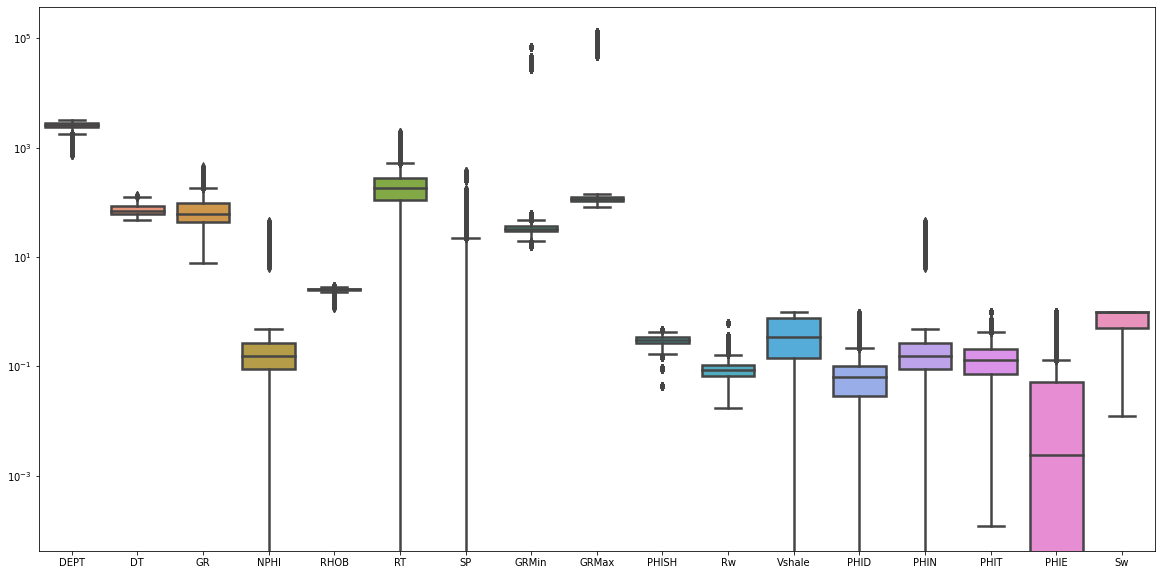

In [12]:
ukuran = (20, 10)
fig, ax = plt.subplots(figsize=ukuran)
g = sns.boxplot(data=dataset,linewidth=2.5,ax=ax)
g.set_yscale("log")

In [13]:
x=dataset[['GR', 'NPHI', 'RHOB', 'RT']]
y=dataset[["Vshale","PHID","PHIT","PHIE","Sw"]]

In [14]:
x_blind=blindset[['GR', 'NPHI', 'RHOB', 'RT']]
y_blind=blindset[["Vshale","PHID","PHIT","PHIE","Sw"]]


## SPLIT TRAIN TEST

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=42) #Splitting the data into Train and Test

In [16]:
def eval_regression(ytest,ytrain,test_pred,train_pred):
    print("MAE_Test: %.3f" % mean_absolute_error(ytest, test_pred)) 
    print("RMSE_Test: %.3f" % mean_squared_error(ytest, test_pred, squared=False)) 
    print('R2 score:_Test %.3f' % r2_score(ytest, test_pred))
    print("=================================================\n=================================================")
    print("MAE_Train: %.3f" % mean_absolute_error(ytrain, train_pred)) 
    print("RMSE_Train: %.3f" % mean_squared_error(ytrain, train_pred, squared=False)) 
    print('R2 score:_Train %.3f' % r2_score(ytrain, train_pred))

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

# Into Maching Learning, its better using 2 or 3 Algorithm

## Linear Regression

In [17]:
LR=LinearRegression()
LR.fit(xtrain, ytrain)
test_pred=LR.predict(xtest)
train_pred=LR.predict(xtrain)
eval_regression(ytest,ytrain,test_pred,train_pred)
print("Train: %.4f" % LR.score(xtrain,ytrain),"Test: %.4f" % LR.score(xtest,ytest))


MAE_Test: 0.073
RMSE_Test: 0.102
R2 score:_Test 0.779
MAE_Train: 0.072
RMSE_Train: 0.102
R2 score:_Train 0.777
Train: 0.7770 Test: 0.7785


## Blind For Linear Regressor

In [18]:



blind_pred = LR.predict(x_blind)


blind_mae = np.round(mean_absolute_error(y_blind, blind_pred),3)
blind_rmse = np.round(mean_squared_error(y_blind, blind_pred, squared=False),3)
blind_r2 = np.round(r2_score(y_blind, blind_pred),3)

print(f"""mla model for Blind:{LR}
===============================
Blind
MAE: {blind_mae}
RMSE: {blind_rmse}
R2 : {blind_r2}
================================
""")


mla model for Blind:LinearRegression()
Blind
MAE: 0.072
RMSE: 0.094
R2 : 0.754



# LASSO

In [19]:
from sklearn.linear_model import Lasso  
laso=Lasso()
laso.fit(xtrain, ytrain)
test_las=laso.predict(xtest)
train_las=laso.predict(xtrain)
eval_regression(ytest,ytrain,test_las,train_las)
print("Train: %.4f" % laso.score(xtrain,ytrain),"Test: %.4f" % laso.score(xtest,ytest))





MAE_Test: 0.111
RMSE_Test: 0.161
R2 score:_Test 0.240
MAE_Train: 0.110
RMSE_Train: 0.161
R2 score:_Train 0.240
Train: 0.2396 Test: 0.2398


# Lasso for blind

In [20]:


blind_pred = laso.predict(x_blind)


blind_mae = np.round(mean_absolute_error(y_blind, blind_pred),3)
blind_rmse = np.round(mean_squared_error(y_blind, blind_pred, squared=False),3)
blind_r2 = np.round(r2_score(y_blind, blind_pred),3)

print(f"""mla model for Blind:{LR}
===============================
Blind
MAE: {blind_mae}
RMSE: {blind_rmse}
R2 : {blind_r2}
================================
""")


mla model for Blind:LinearRegression()
Blind
MAE: 0.101
RMSE: 0.129
R2 : 0.317



# K nearest neighborhood

In [21]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor(algorithm='auto')
kn.fit(xtrain, ytrain)
test_las=kn.predict(xtest)
train_las=kn.predict(xtrain)
eval_regression(ytest,ytrain,test_las,train_las)
print("Train: %.4f" % kn.score(xtrain,ytrain),"Test: %.4f" % kn.score(xtest,ytest))





MAE_Test: 0.063
RMSE_Test: 0.120
R2 score:_Test 0.565
MAE_Train: 0.051
RMSE_Train: 0.096
R2 score:_Train 0.725
Train: 0.7248 Test: 0.5647


# KKN Neighborhood blind

In [22]:

blind_pred = kn.predict(x_blind)


blind_mae = np.round(mean_absolute_error(y_blind, blind_pred),3)
blind_rmse = np.round(mean_squared_error(y_blind, blind_pred, squared=False),3)
blind_r2 = np.round(r2_score(y_blind, blind_pred),3)

print(f"""mla model for Blind:{LR}
===============================
Blind
MAE: {blind_mae}
RMSE: {blind_rmse}
R2 : {blind_r2}
================================
""")


mla model for Blind:LinearRegression()
Blind
MAE: 0.058
RMSE: 0.099
R2 : 0.536



## Random Forest

In [23]:
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)
test_pred=rf.predict(xtest)
train_pred=rf.predict(xtrain)
eval_regression(ytest,ytrain,test_pred,train_pred)
rf.score(xtrain,ytrain),rf.score(xtest,ytest)

MAE_Test: 0.027
RMSE_Test: 0.050
R2 score:_Test 0.947
MAE_Train: 0.010
RMSE_Train: 0.019
R2 score:_Train 0.993


(0.9928719536574382, 0.9472692178014628)

## Random Forest Blind 

In [24]:

blind_pred = rf.predict(x_blind)


blind_mae = np.round(mean_absolute_error(y_blind, blind_pred),3)
blind_rmse = np.round(mean_squared_error(y_blind, blind_pred, squared=False),3)
blind_r2 = np.round(r2_score(y_blind, blind_pred),3)

print(f"""mla model for Blind:{rf}
===============================
Blind
MAE: {blind_mae}
RMSE: {blind_rmse}
R2 : {blind_r2}
================================
""")


mla model for Blind:RandomForestRegressor()
Blind
MAE: 0.028
RMSE: 0.047
R2 : 0.943



## Random Forest Tuning

In [25]:
n_estimators=[20]
criterion=["poisson"]
max_depth=[None]
min_samples_leaf=[64]
max_features=["auto"]
bootstrap=[True]
min_samples_split=[32]
n_jobs=[-1]
oob_score=[False]






hyper=dict(max_depth=max_depth,bootstrap=bootstrap,n_jobs=n_jobs,criterion=criterion,min_samples_split=min_samples_split,
max_features=max_features,min_samples_leaf=min_samples_leaf,oob_score=oob_score,n_estimators=n_estimators)
rf=RandomForestRegressor(random_state=42)
asd=GridSearchCV(rf,hyper,cv=5,scoring='r2')

bestmodel=asd.fit(xtrain,ytrain)
test_pred=bestmodel.predict(xtest)
train_pred=bestmodel.predict(xtrain)
eval_regression(ytest,ytrain,test_pred,train_pred)
print("---------------------------------------------\n--------------")
show_best_hyperparameter(bestmodel.best_estimator_, hyper)
print("Train: %.4f" % bestmodel.score(xtrain,ytrain),"Test: %.4f" % bestmodel.score(xtest,ytest))


MAE_Test: 0.062
RMSE_Test: 0.102
R2 score:_Test 0.743
MAE_Train: 0.060
RMSE_Train: 0.101
R2 score:_Train 0.749
---------------------------------------------
--------------
Best max_depth: None
Best bootstrap: True
Best n_jobs: -1
Best criterion: poisson
Best min_samples_split: 32
Best max_features: auto
Best min_samples_leaf: 64
Best oob_score: False
Best n_estimators: 20
Train: 0.7491 Test: 0.7429


## Random Forest Blind Tuning

In [26]:

blind_pred = bestmodel.predict(x_blind)


blind_mae = np.round(mean_absolute_error(y_blind, blind_pred),3)
blind_rmse = np.round(mean_squared_error(y_blind, blind_pred, squared=False),3)
blind_r2 = np.round(r2_score(y_blind, blind_pred),3)

print(f"""mla model for Blind:{rf}
===============================
Blind
MAE: {blind_mae}
RMSE: {blind_rmse}
R2 : {blind_r2}
================================
""")


mla model for Blind:RandomForestRegressor(random_state=42)
Blind
MAE: 0.056
RMSE: 0.082
R2 : 0.792



## Decision Tree Regressor

In [27]:
dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
test_pred=dt.predict(xtest)
train_pred=dt.predict(xtrain)
eval_regression(ytest,ytrain,test_pred,train_pred)
dt.score(xtrain,ytrain),dt.score(xtest,ytest)

MAE_Test: 0.035
RMSE_Test: 0.071
R2 score:_Test 0.897
MAE_Train: 0.000
RMSE_Train: 0.000
R2 score:_Train 1.000


(1.0, 0.8972694773005225)

## Decision Tree Regressor Blind

In [28]:

blind_pred = dt.predict(x_blind)


blind_mae = np.round(mean_absolute_error(y_blind, blind_pred),3)
blind_rmse = np.round(mean_squared_error(y_blind, blind_pred, squared=False),3)
blind_r2 = np.round(r2_score(y_blind, blind_pred),3)

print(f"""mla model for Blind:{dt}
===============================
Blind
MAE: {blind_mae}
RMSE: {blind_rmse}
R2 : {blind_r2}
================================
""")

mla model for Blind:DecisionTreeRegressor()
Blind
MAE: 0.037
RMSE: 0.069
R2 : 0.874



## Decision Tree Regressor Tuning 

In [29]:
parameter = {"max_depth":[4],
                      "splitter": ["best","random"],
                      "min_samples_split":[3]}


dt = DecisionTreeRegressor(random_state=42)
clfdt = GridSearchCV(dt, parameter, cv=5,scoring='r2')

#Fitting Model
best_model4 = clfdt.fit(xtrain, ytrain)



test_pred=best_model4.predict(xtest)
train_pred=best_model4.predict(xtrain)
eval_regression(ytest,ytrain,test_pred,train_pred)
best_model4.score(xtrain,ytrain),best_model4.score(xtest,ytest)

MAE_Test: 0.066
RMSE_Test: 0.107
R2 score:_Test 0.719
MAE_Train: 0.066
RMSE_Train: 0.107
R2 score:_Train 0.711


(0.7107962890533075, 0.7187611060537864)

## Decision Tree Regressor Blind With Tuning

In [30]:

blind_pred = best_model4.predict(x_blind)


blind_mae = np.round(mean_absolute_error(y_blind, blind_pred),3)
blind_rmse = np.round(mean_squared_error(y_blind, blind_pred, squared=False),3)
blind_r2 = np.round(r2_score(y_blind, blind_pred),3)

print(f"""mla model for Blind:{best_model4}
===============================
Blind
MAE: {blind_mae}
RMSE: {blind_rmse}
R2 : {blind_r2}
================================
""")

mla model for Blind:GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [4], 'min_samples_split': [3],
                         'splitter': ['best', 'random']},
             scoring='r2')
Blind
MAE: 0.061
RMSE: 0.088
R2 : 0.754



# <font color='blue'>================================================================================================================

# <font color='blue'>================================================================================================================

# Testing in Blind Dataset Accuracy,R2,Rmse   ( Random Forest)

In [31]:
for well in blind:
    try:
        well1_ = pd.read_csv(well).dropna(subset=["GR", "NPHI", "RHOB", "RT","Vshale","PHID","PHIT","PHIE","Sw"])
        X_ = well1_[['GR', 'NPHI', 'RHOB', 'RT']]
    #     y_ = well1[["vshale","phid","phit","phie","sw"]]

        pred_ = rf.predict(X_)

        vshale = well1_['Vshale']
        phie = well1_['PHIE']
        sw = well1_['Sw']

        vshale_ = pred_[:,0]
        phie_ = pred_[:,3]
        sw_ = pred_[:,4]

        r2_vshale = np.round(r2_score(vshale, vshale_),3)
        r2_phie = np.round(r2_score(phie, phie_),3)
        r2_sw = np.round(r2_score(sw, sw_),3)

        print(well,'\t\t' "ini adalah: R2 Vshale" ,r2_vshale)
        print(well,'\t\t' "ini adalah: R2 PHIE" ,r2_phie)
        print(well,'\t\t' "ini adalah: R2 SW" ,r2_sw)
        print("=========================================")

        plt.figure(figsize=(8,10))
        plt.subplot(1,3,1)
        
        plt.title(f"{well}, PHIE",fontsize=8)
        plt.plot(phie,'DEPT',data=well1_)
        plt.plot(phie_,'DEPT',data=well1_)
        # plt.ylim(875,1000)
        plt.gca().invert_yaxis()

        plt.subplot(1,3,2)
        
        plt.title(f"{well}, Vshale",fontsize=8)
        plt.plot(vshale,'DEPT',data=well1_)
        plt.plot(vshale_,'DEPT',data=well1_)
        # plt.ylim(875,1000)
        plt.gca().invert_yaxis()


        plt.subplot(1,3,3)
        
        plt.title(f"{well}, Sw",fontsize=8)
        plt.plot(sw,'DEPT',data=well1_)
        plt.plot(sw_,'DEPT',data=well1_)
        # plt.ylim(875,1000)
        plt.gca().invert_yaxis()



   
    except:
        print('errror on ', well)
 




errror on  kalkulasifilter\A. Goering 1.csv
errror on  kalkulasifilter\Alan C-1.csv
errror on  kalkulasifilter\Amstutz 1-8.csv
errror on  kalkulasifilter\Ankerholz 'A' 1.csv
errror on  kalkulasifilter\B.B. Ainsworth 13.csv
errror on  kalkulasifilter\Beagley 1.csv
errror on  kalkulasifilter\Behnke 1-15.csv
errror on  kalkulasifilter\Berry 5.csv
errror on  kalkulasifilter\Berry 6.csv
errror on  kalkulasifilter\Blackhall 5.csv


# Testing in Blind Dataset  Accuracy,R2,Rmse  (Lasso)

kalkulasifilter\A. Goering 1.csv 		ini adalah: R2 Vshale 0.797
kalkulasifilter\A. Goering 1.csv 		ini adalah: R2 PHIE 0.114
kalkulasifilter\A. Goering 1.csv 		ini adalah: R2 SW 0.391
kalkulasifilter\Alan C-1.csv 		ini adalah: R2 Vshale 0.763
kalkulasifilter\Alan C-1.csv 		ini adalah: R2 PHIE -0.301
kalkulasifilter\Alan C-1.csv 		ini adalah: R2 SW 0.436
kalkulasifilter\Amstutz 1-8.csv 		ini adalah: R2 Vshale 0.712
kalkulasifilter\Amstutz 1-8.csv 		ini adalah: R2 PHIE -1.159
kalkulasifilter\Amstutz 1-8.csv 		ini adalah: R2 SW 0.153
kalkulasifilter\Ankerholz 'A' 1.csv 		ini adalah: R2 Vshale 0.701
kalkulasifilter\Ankerholz 'A' 1.csv 		ini adalah: R2 PHIE -1.958
kalkulasifilter\Ankerholz 'A' 1.csv 		ini adalah: R2 SW 0.058
kalkulasifilter\B.B. Ainsworth 13.csv 		ini adalah: R2 Vshale 0.746
kalkulasifilter\B.B. Ainsworth 13.csv 		ini adalah: R2 PHIE -0.085
kalkulasifilter\B.B. Ainsworth 13.csv 		ini adalah: R2 SW 0.478
kalkulasifilter\Beagley 1.csv 		ini adalah: R2 Vshale 0.71
kalkulasifilt

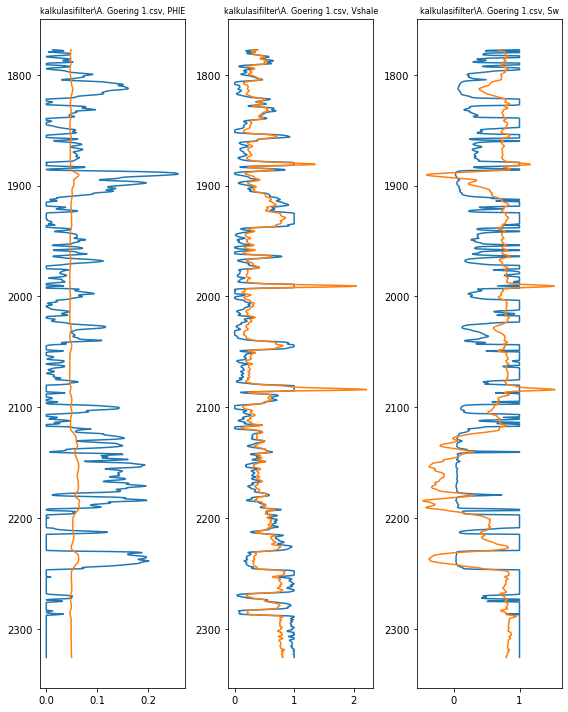

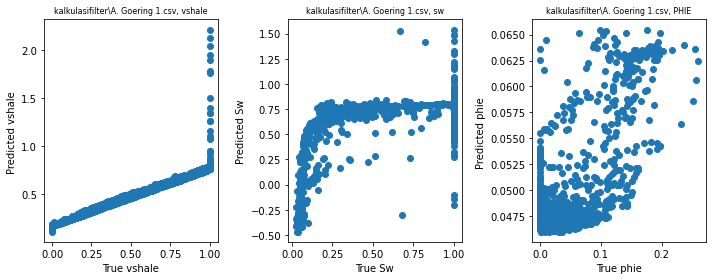

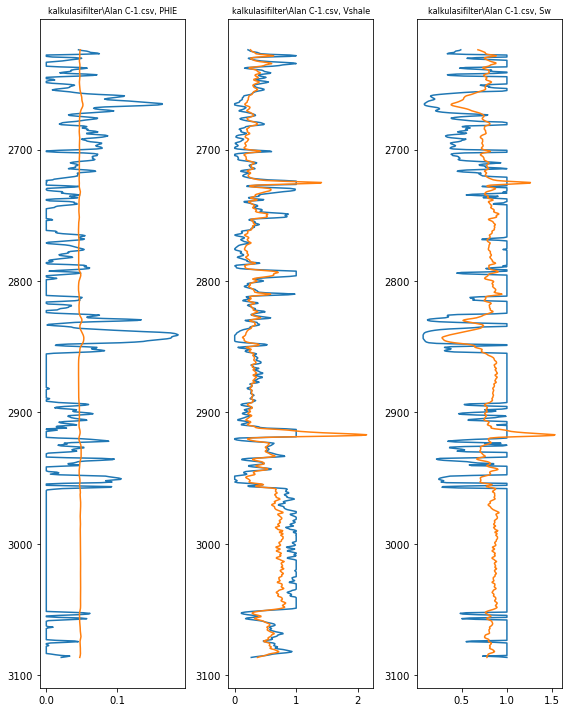

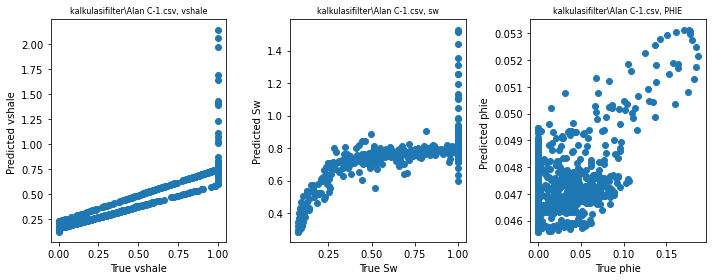

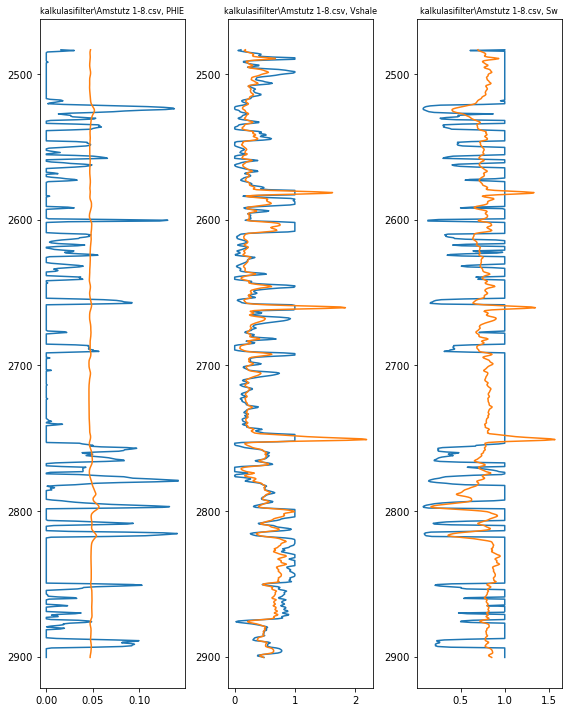

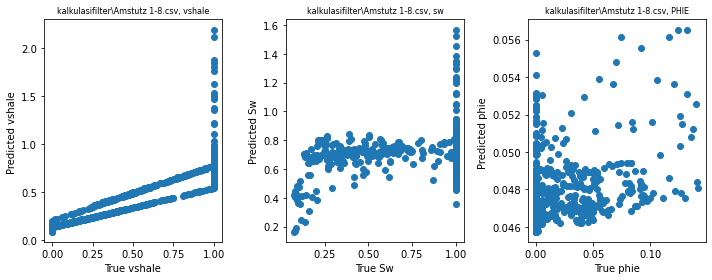

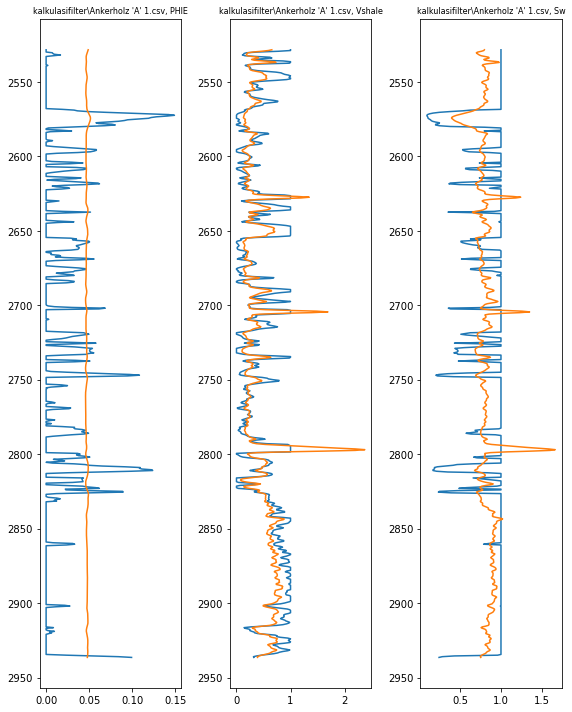

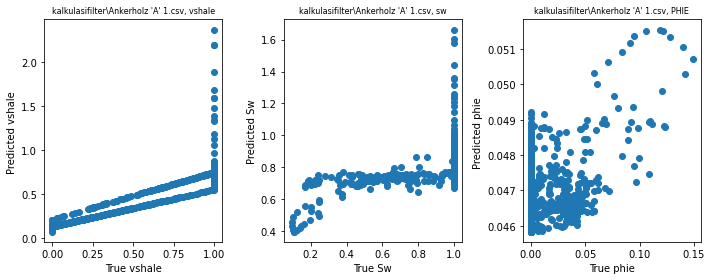

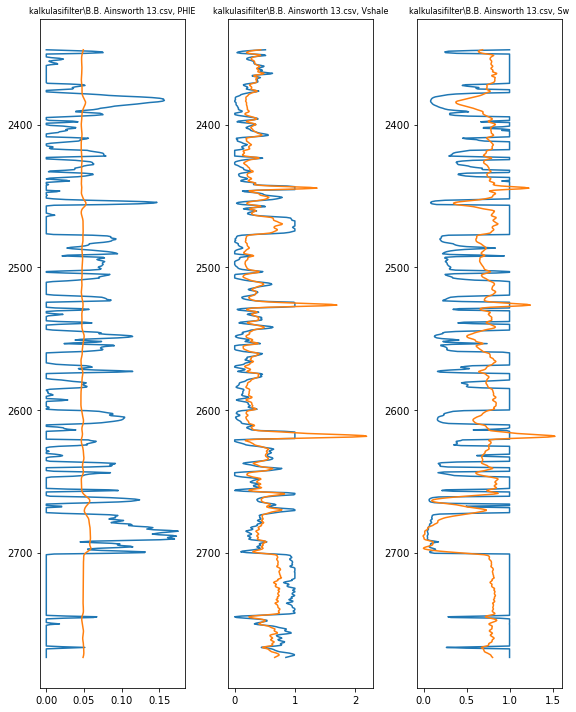

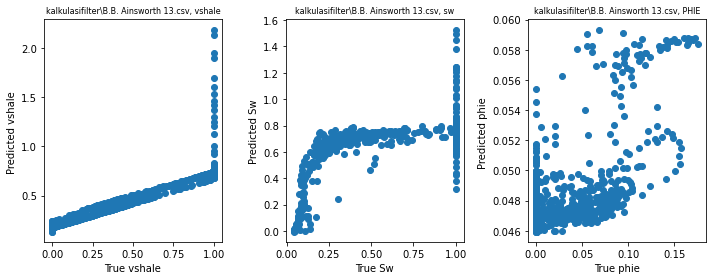

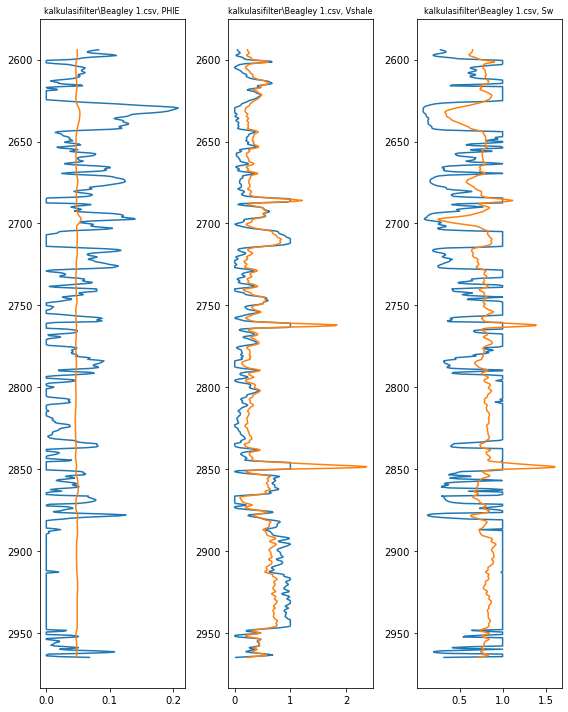

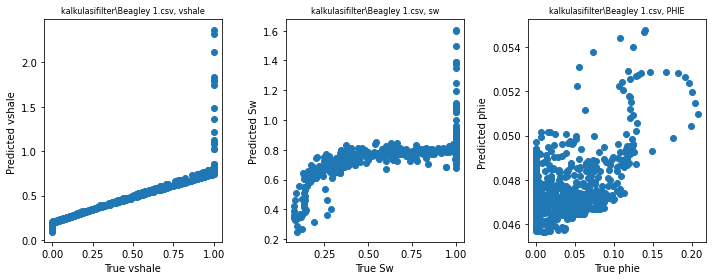

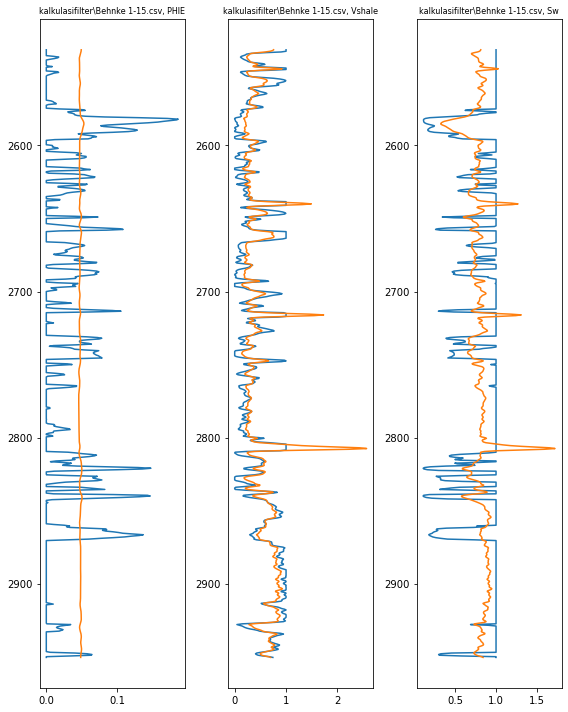

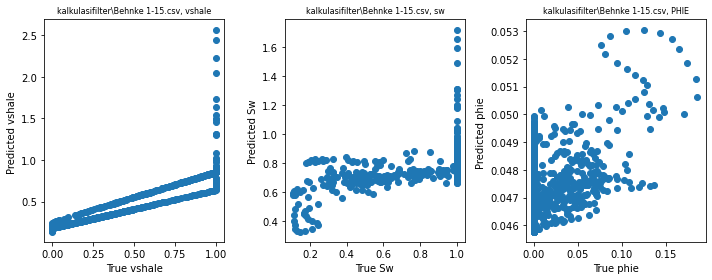

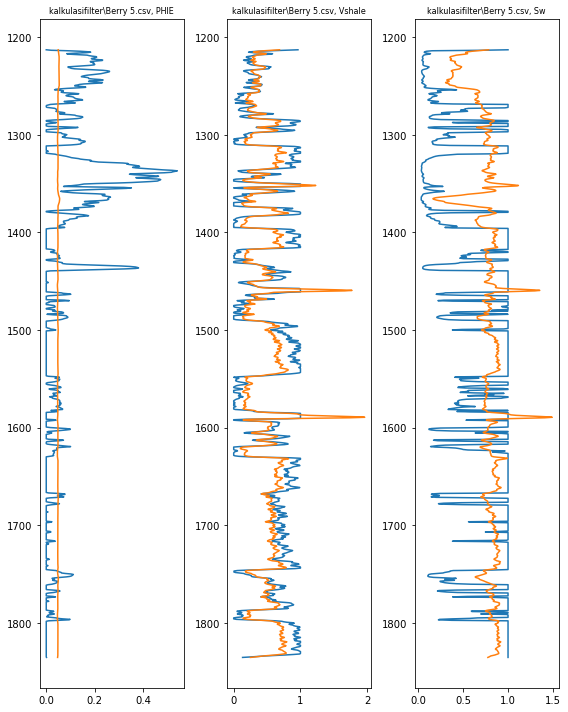

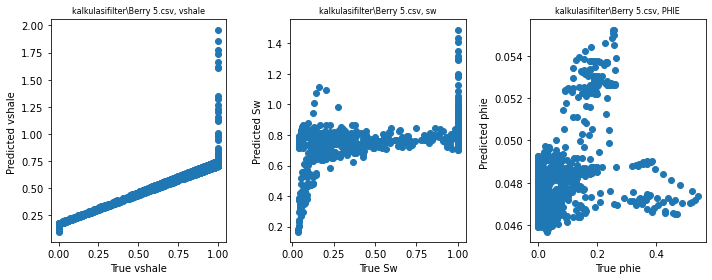

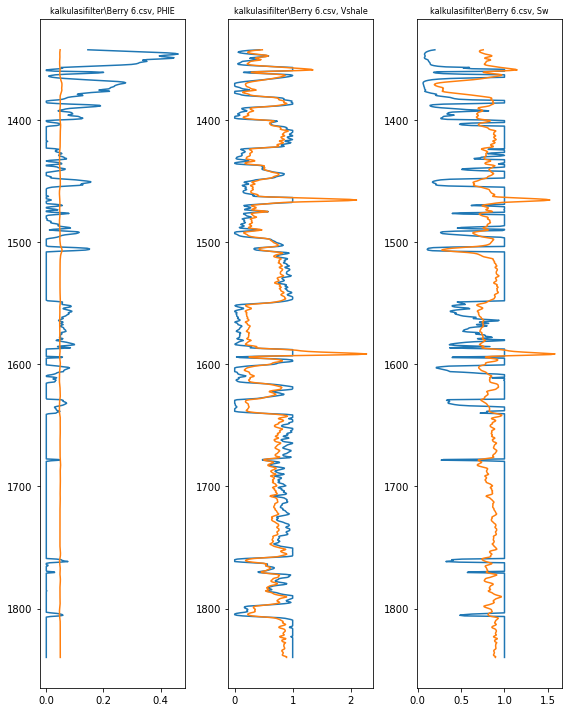

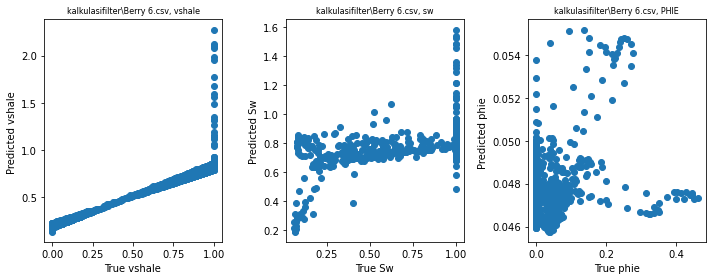

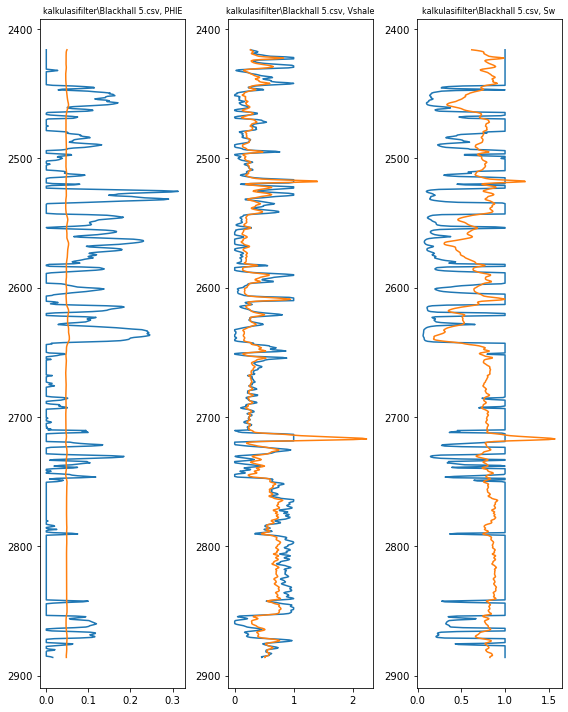

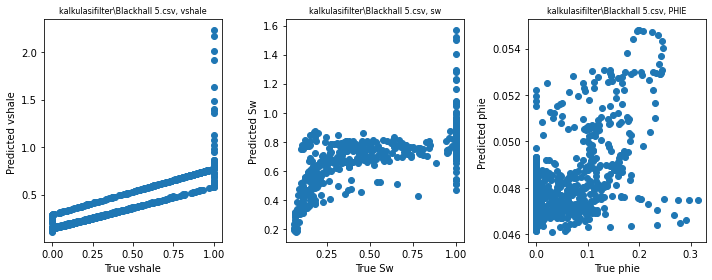

In [32]:
for well in blind:
    try:
        well1_ = pd.read_csv(well).dropna(subset=["GR", "NPHI", "RHOB", "RT","Vshale","PHID","PHIT","PHIE","Sw"])
        X_ = well1_[['GR', 'NPHI', 'RHOB', 'RT']]
    #     y_ = well1[["vshale","phid","phit","phie","sw"]]

        pred_ = laso.predict(X_)

        vshale = well1_['Vshale']
        phie = well1_['PHIE']
        sw = well1_['Sw']

        vshale_ = pred_[:,0]
        phie_ = pred_[:,3]
        sw_ = pred_[:,4]

        r2_vshale = np.round(r2_score(vshale, vshale_),3)
        r2_phie = np.round(r2_score(phie, phie_),3)
        r2_sw = np.round(r2_score(sw, sw_),3)

        print(well,'\t\t' "ini adalah: R2 Vshale" ,r2_vshale)
        print(well,'\t\t' "ini adalah: R2 PHIE" ,r2_phie)
        print(well,'\t\t' "ini adalah: R2 SW" ,r2_sw)
        print("=========================================")

        plt.figure(figsize=(8,10))
        plt.subplot(1,3,1)
        
        plt.title(f"{well}, PHIE",fontsize=8)
        plt.plot(phie,'DEPT',data=well1_)
        plt.plot(phie_,'DEPT',data=well1_)
        # plt.ylim(875,1000)
        plt.gca().invert_yaxis()

        plt.subplot(1,3,2)
        
        plt.title(f"{well}, Vshale",fontsize=8)
        plt.plot(vshale,'DEPT',data=well1_)
        plt.plot(vshale_,'DEPT',data=well1_)
        # plt.ylim(875,1000)
        plt.gca().invert_yaxis()


        plt.subplot(1,3,3)
        
        plt.title(f"{well}, Sw",fontsize=8)
        plt.plot(sw,'DEPT',data=well1_)
        plt.plot(sw_,'DEPT',data=well1_)
        # plt.ylim(875,1000)
        plt.gca().invert_yaxis()

        plt.tight_layout()

        
        plt.figure(figsize=(10,4))
      
        plt.subplot(1,3,1)
        plt.title(f"{well}, vshale", fontsize=8)
        plt.scatter(vshale, vshale_ )
        plt.xlabel("True vshale")
        plt.ylabel("Predicted vshale ")
    
        plt.subplot(1,3,2)
        plt.title(f"{well}, sw", fontsize=8)
        plt.scatter(sw, sw_ )
        plt.xlabel("True Sw")
        plt.ylabel("Predicted Sw")

        plt.subplot(1,3,3)
        plt.title(f"{well}, PHIE", fontsize=8)
        plt.scatter(phie, phie_ )
        plt.xlabel("True phie")
        plt.ylabel("Predicted phie ")

        plt.tight_layout()
        
        
        



    except:
        print('errror on ', well)
 




# Testing in Blind Dataset  Accuracy,R2,Rmse  (KKN)

kalkulasifilter\A. Goering 1.csv 		ini adalah: R2 Vshale 0.956
kalkulasifilter\A. Goering 1.csv 		ini adalah: R2 PHIE 0.597
kalkulasifilter\A. Goering 1.csv 		ini adalah: R2 SW 0.649
kalkulasifilter\Alan C-1.csv 		ini adalah: R2 Vshale 0.934
kalkulasifilter\Alan C-1.csv 		ini adalah: R2 PHIE 0.317
kalkulasifilter\Alan C-1.csv 		ini adalah: R2 SW 0.684
kalkulasifilter\Amstutz 1-8.csv 		ini adalah: R2 Vshale 0.865
kalkulasifilter\Amstutz 1-8.csv 		ini adalah: R2 PHIE -0.638
kalkulasifilter\Amstutz 1-8.csv 		ini adalah: R2 SW 0.163
kalkulasifilter\Ankerholz 'A' 1.csv 		ini adalah: R2 Vshale 0.89
kalkulasifilter\Ankerholz 'A' 1.csv 		ini adalah: R2 PHIE -0.504
kalkulasifilter\Ankerholz 'A' 1.csv 		ini adalah: R2 SW 0.348
kalkulasifilter\B.B. Ainsworth 13.csv 		ini adalah: R2 Vshale 0.947
kalkulasifilter\B.B. Ainsworth 13.csv 		ini adalah: R2 PHIE 0.355
kalkulasifilter\B.B. Ainsworth 13.csv 		ini adalah: R2 SW 0.718
kalkulasifilter\Beagley 1.csv 		ini adalah: R2 Vshale 0.928
kalkulasifilter

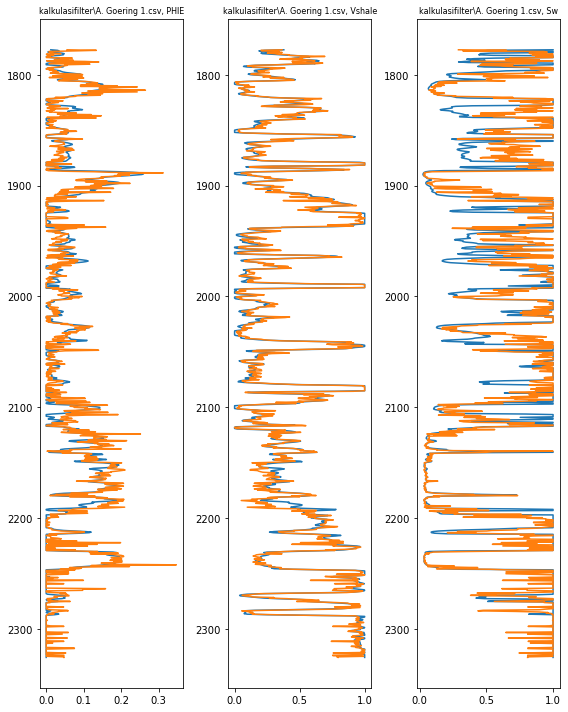

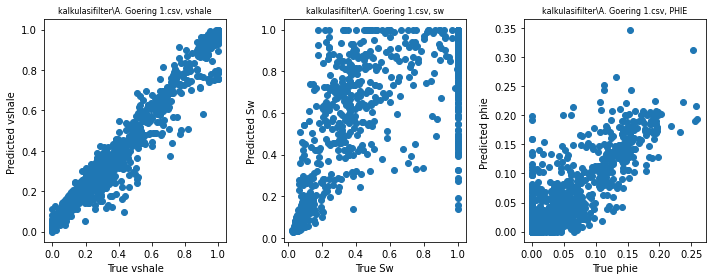

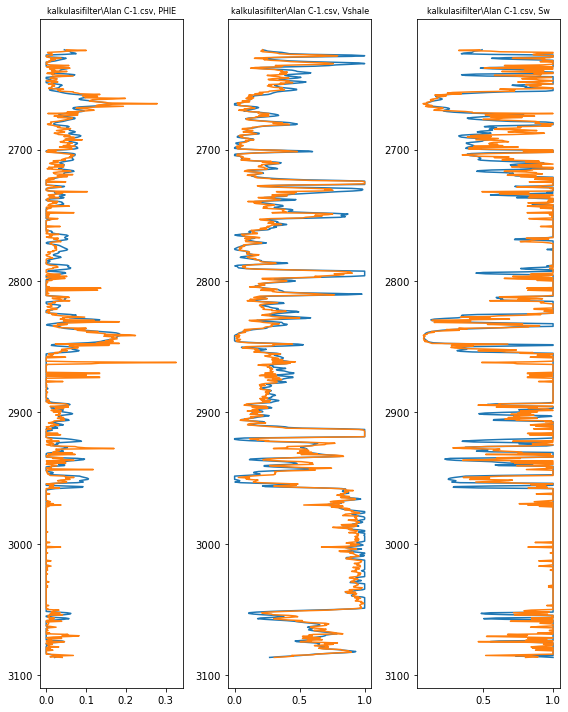

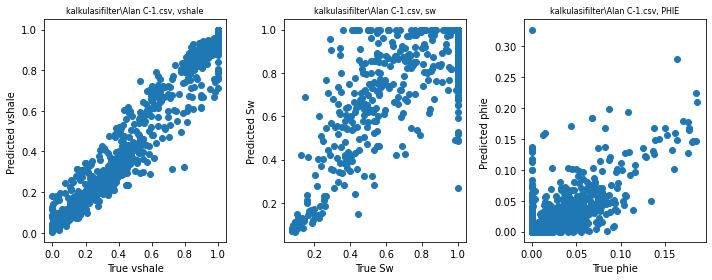

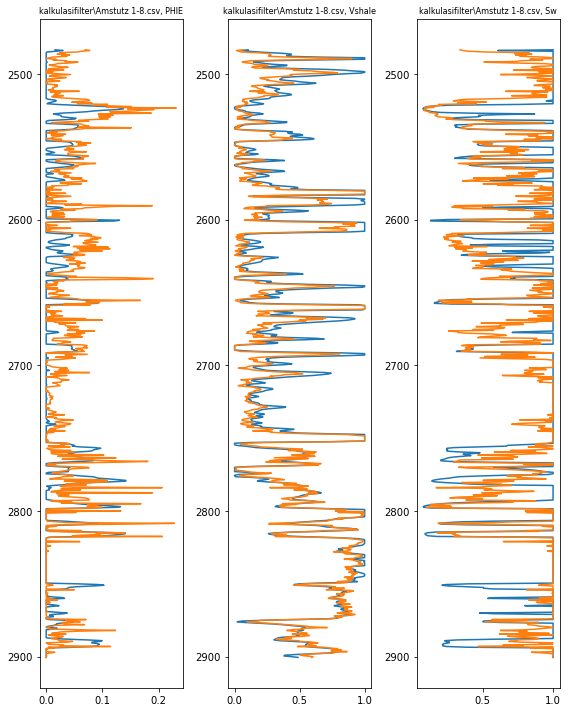

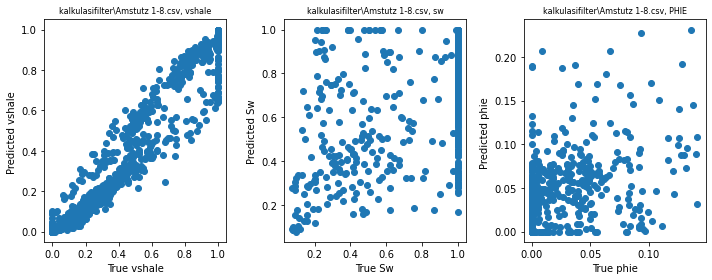

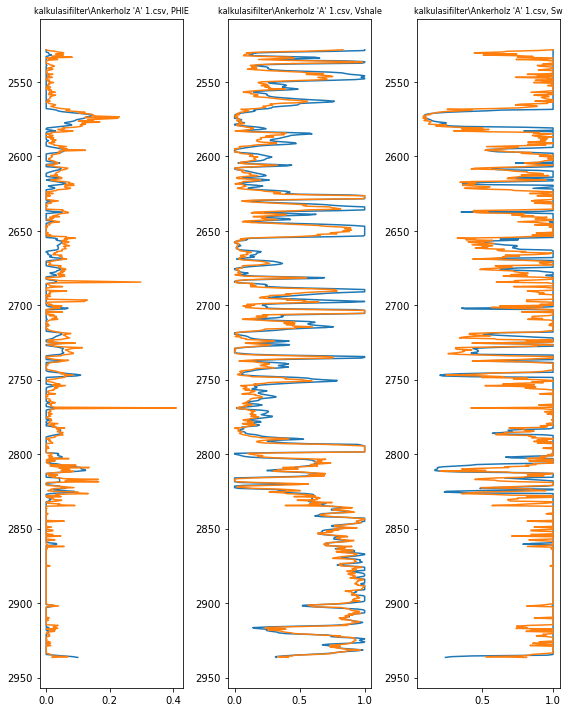

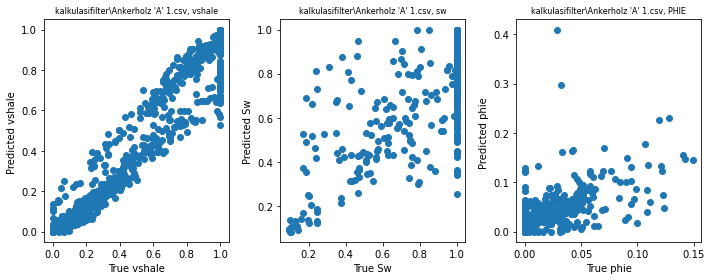

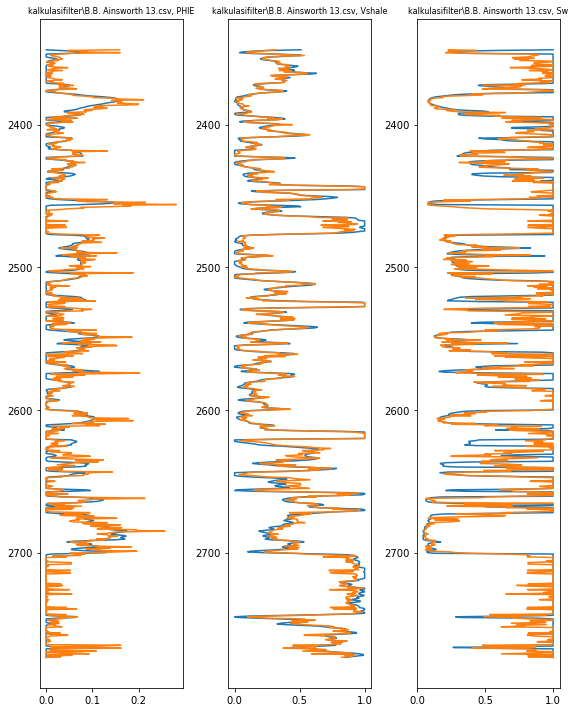

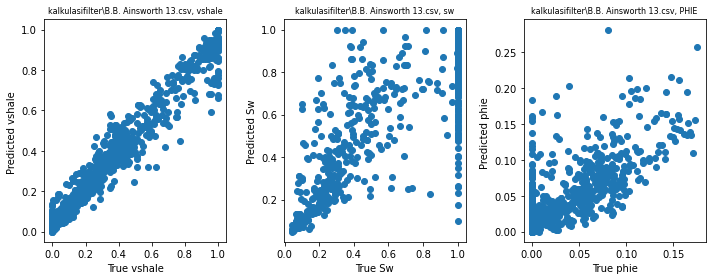

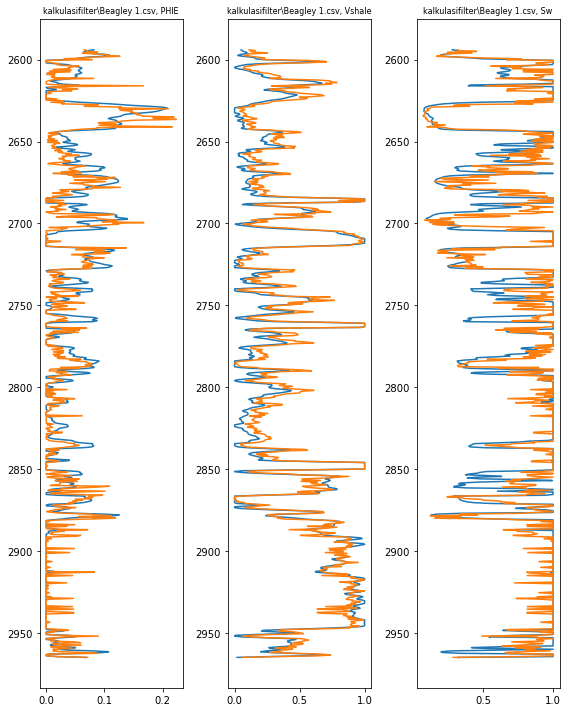

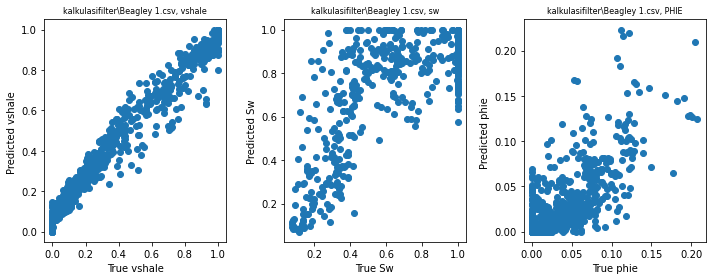

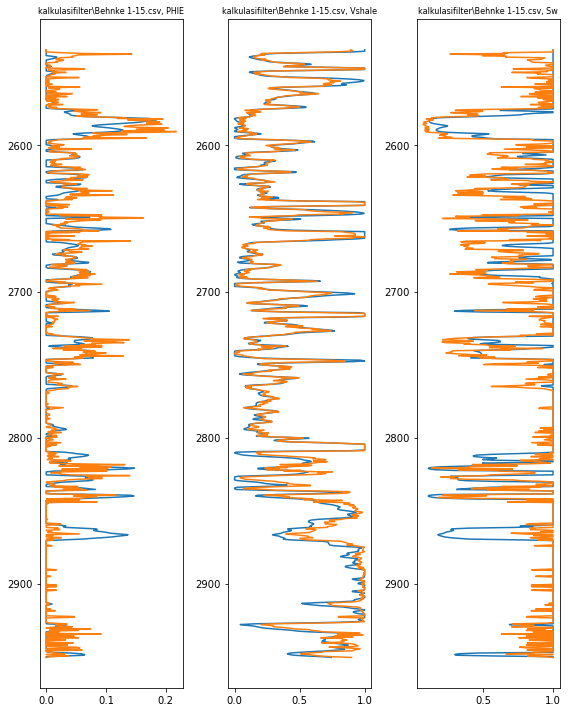

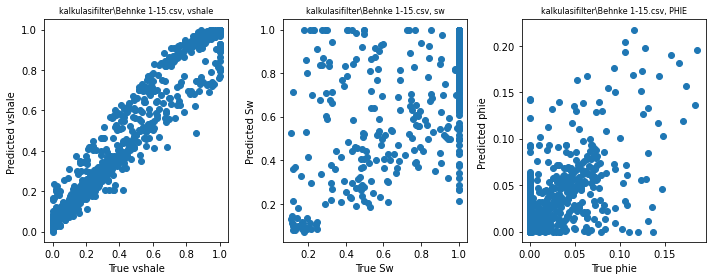

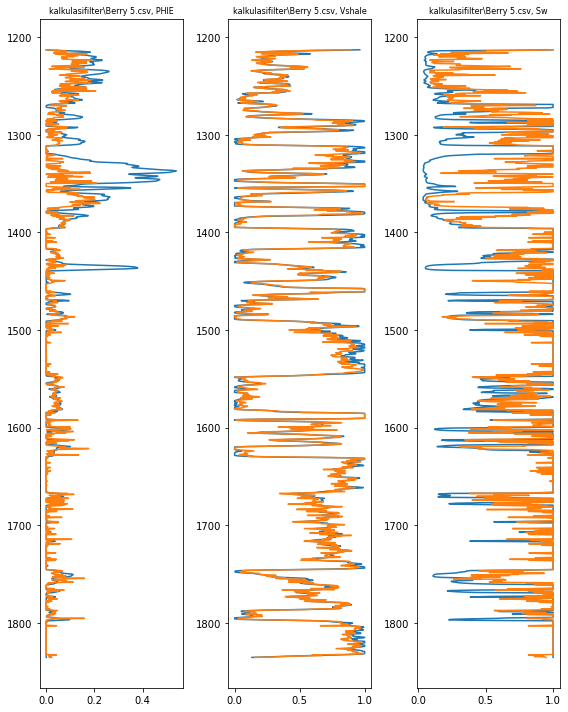

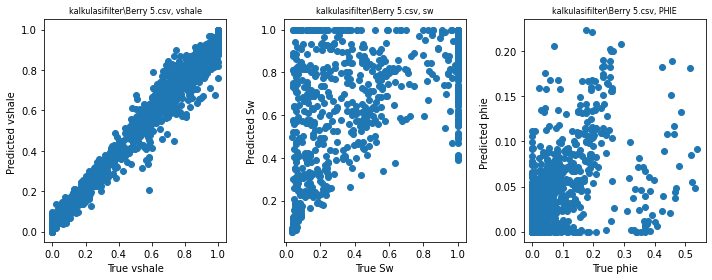

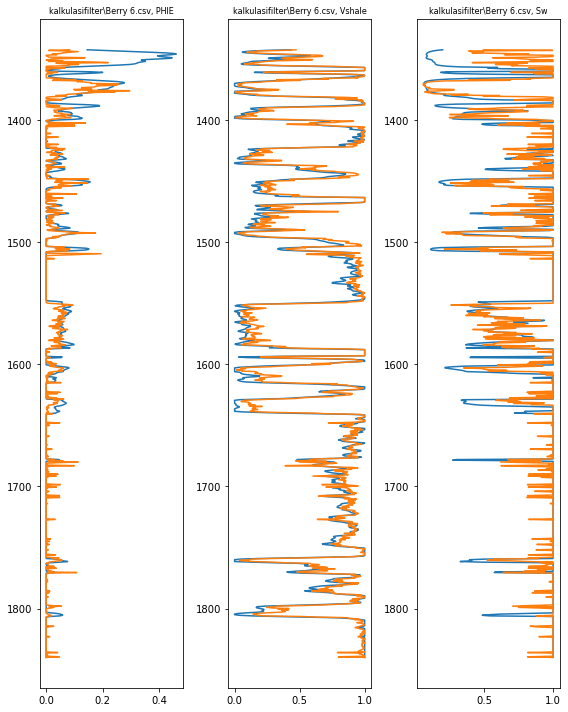

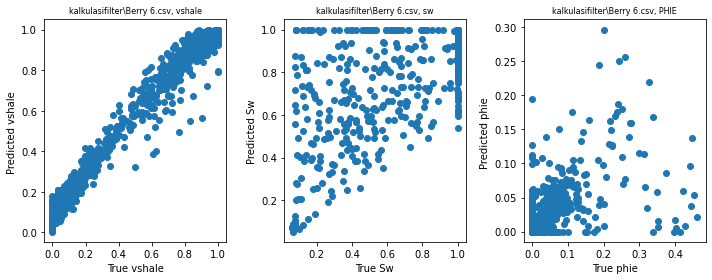

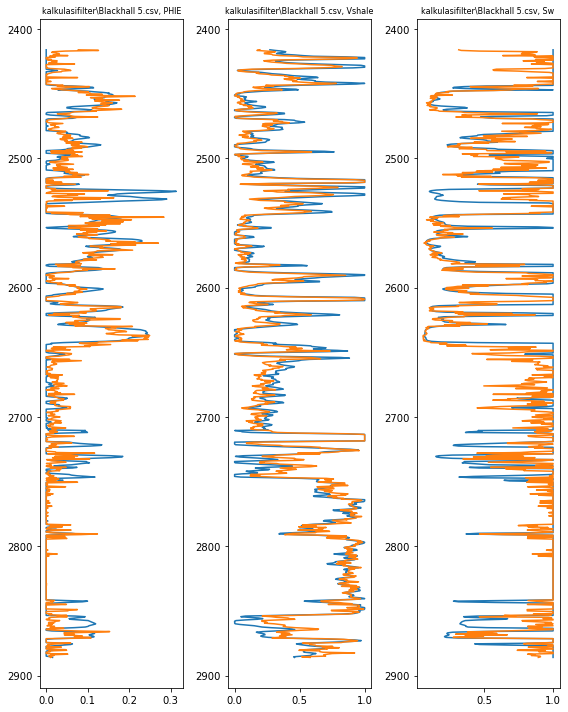

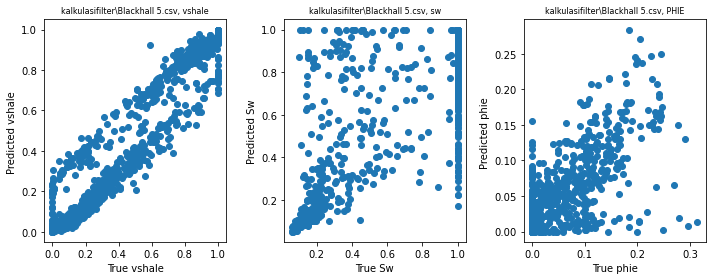

In [33]:
for well in blind:
    try:
        well1_ = pd.read_csv(well).dropna(subset=["GR", "NPHI", "RHOB", "RT","Vshale","PHID","PHIT","PHIE","Sw"])
        X_ = well1_[['GR', 'NPHI', 'RHOB', 'RT']]
    #     y_ = well1[["vshale","phid","phit","phie","sw"]]

        pred_ = kn.predict(X_)

        vshale = well1_['Vshale']
        phie = well1_['PHIE']
        sw = well1_['Sw']

        vshale_ = pred_[:,0]
        phie_ = pred_[:,3]
        sw_ = pred_[:,4]

        r2_vshale = np.round(r2_score(vshale, vshale_),3)
        r2_phie = np.round(r2_score(phie, phie_),3)
        r2_sw = np.round(r2_score(sw, sw_),3)

        print(well,'\t\t' "ini adalah: R2 Vshale" ,r2_vshale)
        print(well,'\t\t' "ini adalah: R2 PHIE" ,r2_phie)
        print(well,'\t\t' "ini adalah: R2 SW" ,r2_sw)
        print("=========================================")

        plt.figure(figsize=(8,10))
        plt.subplot(1,3,1)
        
        plt.title(f"{well}, PHIE",fontsize=8)
        plt.plot(phie,'DEPT',data=well1_)
        plt.plot(phie_,'DEPT',data=well1_)
        # plt.ylim(875,1000)
        plt.gca().invert_yaxis()

        plt.subplot(1,3,2)
        
        plt.title(f"{well}, Vshale",fontsize=8)
        plt.plot(vshale,'DEPT',data=well1_)
        plt.plot(vshale_,'DEPT',data=well1_)
        # plt.ylim(875,1000)
        plt.gca().invert_yaxis()


        plt.subplot(1,3,3)
        
        plt.title(f"{well}, Sw",fontsize=8)
        plt.plot(sw,'DEPT',data=well1_)
        plt.plot(sw_,'DEPT',data=well1_)
        # plt.ylim(875,1000)
        plt.gca().invert_yaxis()

        plt.tight_layout()


        
        plt.figure(figsize=(10,4))
      
        plt.subplot(1,3,1)
        plt.title(f"{well}, vshale", fontsize=8)
        plt.scatter(vshale, vshale_ )
        plt.xlabel("True vshale")
        plt.ylabel("Predicted vshale ")
    
        plt.subplot(1,3,2)
        plt.title(f"{well}, sw", fontsize=8)
        plt.scatter(sw, sw_ )
        plt.xlabel("True Sw")
        plt.ylabel("Predicted Sw")

        plt.subplot(1,3,3)
        plt.title(f"{well}, PHIE", fontsize=8)
        plt.scatter(phie, phie_ )
        plt.xlabel("True phie")
        plt.ylabel("Predicted phie ")

        plt.tight_layout()


    except:
        print('errror on ', well)
 




# Testing in Blind Dataset  Accuracy,R2,Rmse  (Decision Tree)

In [34]:
for well in blind:
    try:
        well1_ = pd.read_csv(well).dropna(subset=["GR", "NPHI", "RHOB", "RT","Vshale","PHID","PHIT","PHIE","Sw"])
        X_ = well1_[['GR', 'NPHI', 'RHOB', 'RT']]
    #     y_ = well1[["vshale","phid","phit","phie","sw"]]

        pred_ = dt.predict(X_)

        vshale = well1_['Vshale']
        phie = well1_['PHIE']
        sw = well1_['Sw']

        vshale_ = pred_[:,0]
        phie_ = pred_[:,3]
        sw_ = pred_[:,4]

        r2_vshale = np.round(r2_score(vshale, vshale_),3)
        r2_phie = np.round(r2_score(phie, phie_),3)
        r2_sw = np.round(r2_score(sw, sw_),3)

        print(well,'\t\t' "ini adalah: R2 Vshale" ,r2_vshale)
        print(well,'\t\t' "ini adalah: R2 PHIE" ,r2_phie)
        print(well,'\t\t' "ini adalah: R2 SW" ,r2_sw)
        print("=========================================")

        plt.figure(figsize=(8,10))
        plt.subplot(1,3,1)
        
        plt.title(f"{well}, PHIE",fontsize=8)
        plt.plot(phie,'DEPT',data=well1_)
        plt.plot(phie_,'DEPT',data=well1_)
        # plt.ylim(875,1000)
        plt.gca().invert_yaxis()

        plt.subplot(1,3,2)
        
        plt.title(f"{well}, Vshale",fontsize=8)
        plt.plot(vshale,'DEPT',data=well1_)
        plt.plot(vshale_,'DEPT',data=well1_)
        # plt.ylim(875,1000)
        plt.gca().invert_yaxis()


        plt.subplot(1,3,3)
        
        plt.title(f"{well}, Sw",fontsize=8)
        plt.plot(sw,'DEPT',data=well1_)
        plt.plot(sw_,'DEPT',data=well1_)
        # plt.ylim(875,1000)
        plt.gca().invert_yaxis()





    except:
        print('errror on ', well)
 




errror on  kalkulasifilter\A. Goering 1.csv
errror on  kalkulasifilter\Alan C-1.csv
errror on  kalkulasifilter\Amstutz 1-8.csv
errror on  kalkulasifilter\Ankerholz 'A' 1.csv
errror on  kalkulasifilter\B.B. Ainsworth 13.csv
errror on  kalkulasifilter\Beagley 1.csv
errror on  kalkulasifilter\Behnke 1-15.csv
errror on  kalkulasifilter\Berry 5.csv
errror on  kalkulasifilter\Berry 6.csv
errror on  kalkulasifilter\Blackhall 5.csv


# Testing in Blind Dataset Accuracy,R2,Rmse  (Linear Regressor)

kalkulasifilter\A. Goering 1.csv 		ini adalah: R2 Vshale 0.811
kalkulasifilter\A. Goering 1.csv 		ini adalah: R2 PHIE 0.678
kalkulasifilter\A. Goering 1.csv 		ini adalah: R2 SW 0.362
kalkulasifilter\Alan C-1.csv 		ini adalah: R2 Vshale 0.786
kalkulasifilter\Alan C-1.csv 		ini adalah: R2 PHIE 0.519
kalkulasifilter\Alan C-1.csv 		ini adalah: R2 SW 0.537
kalkulasifilter\Amstutz 1-8.csv 		ini adalah: R2 Vshale 0.711
kalkulasifilter\Amstutz 1-8.csv 		ini adalah: R2 PHIE -0.217
kalkulasifilter\Amstutz 1-8.csv 		ini adalah: R2 SW 0.299
kalkulasifilter\Ankerholz 'A' 1.csv 		ini adalah: R2 Vshale 0.706
kalkulasifilter\Ankerholz 'A' 1.csv 		ini adalah: R2 PHIE -0.667
kalkulasifilter\Ankerholz 'A' 1.csv 		ini adalah: R2 SW 0.216
kalkulasifilter\B.B. Ainsworth 13.csv 		ini adalah: R2 Vshale 0.761
kalkulasifilter\B.B. Ainsworth 13.csv 		ini adalah: R2 PHIE 0.623
kalkulasifilter\B.B. Ainsworth 13.csv 		ini adalah: R2 SW 0.53
kalkulasifilter\Beagley 1.csv 		ini adalah: R2 Vshale 0.719
kalkulasifilter

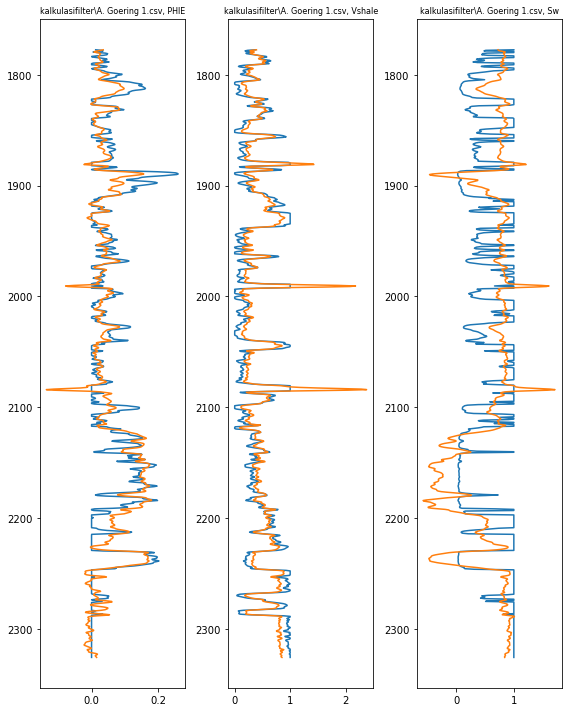

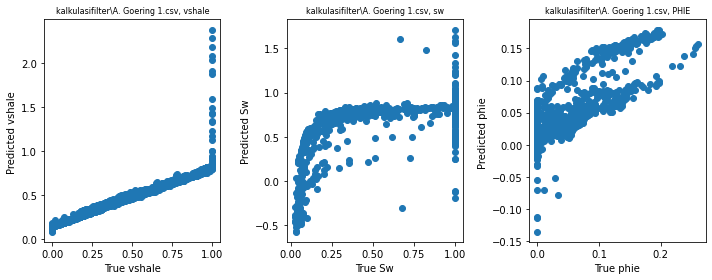

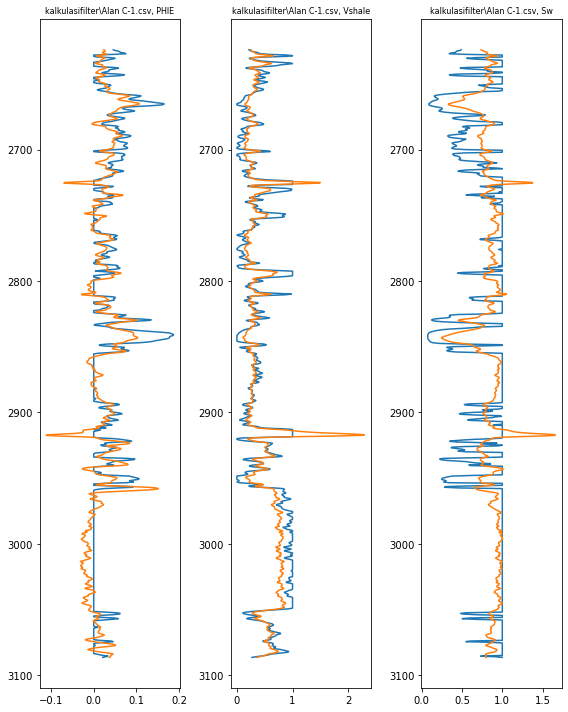

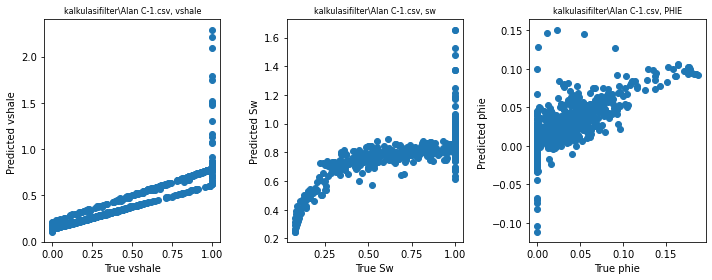

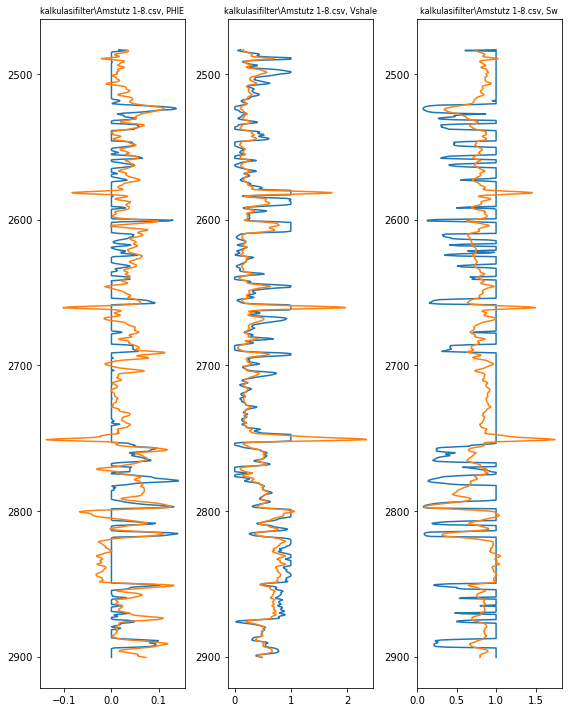

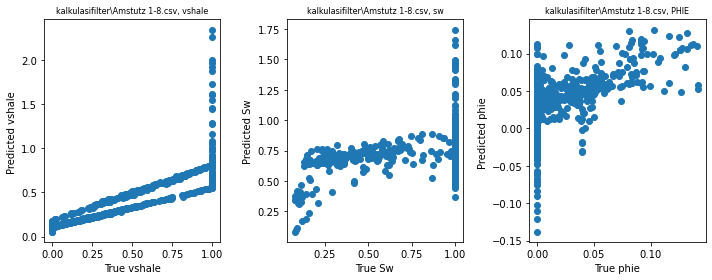

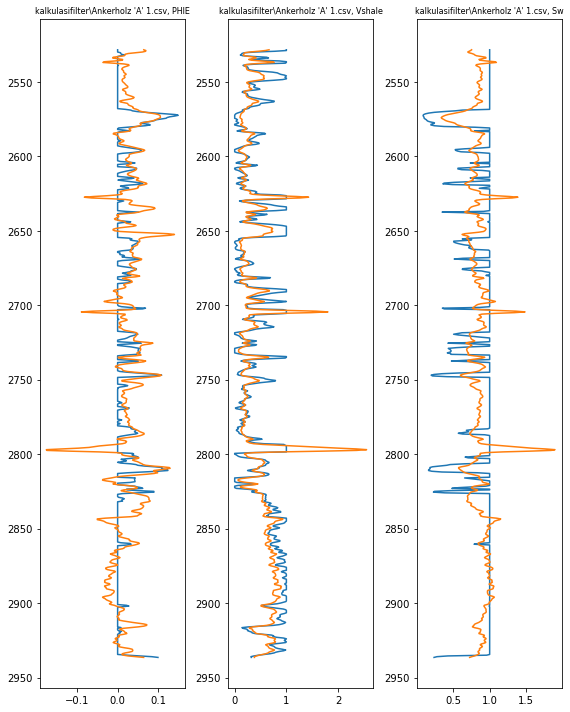

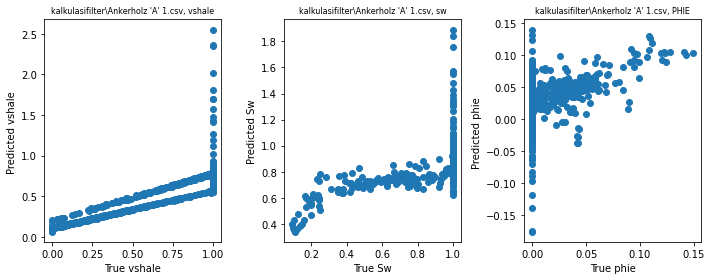

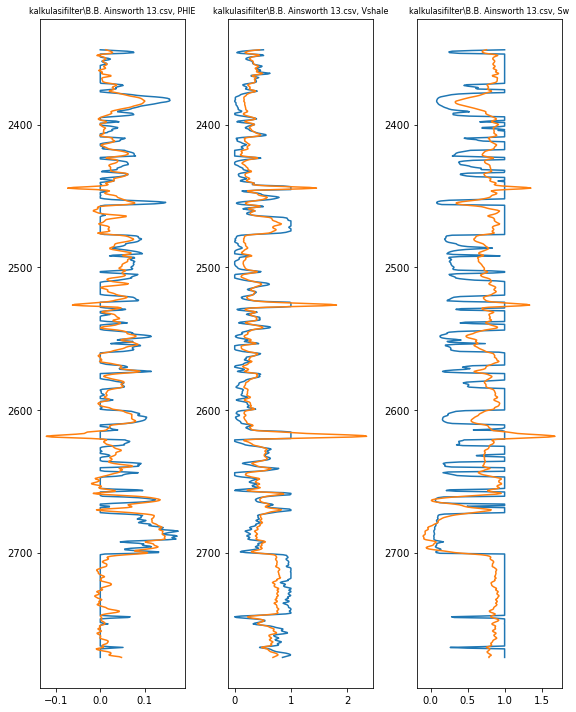

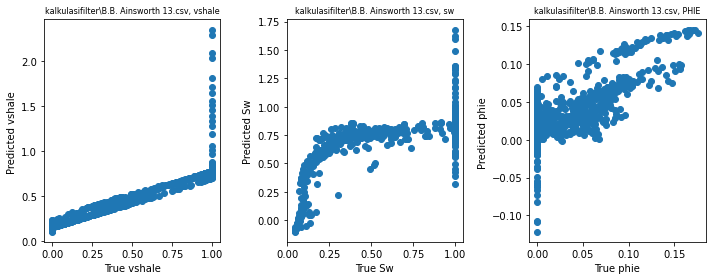

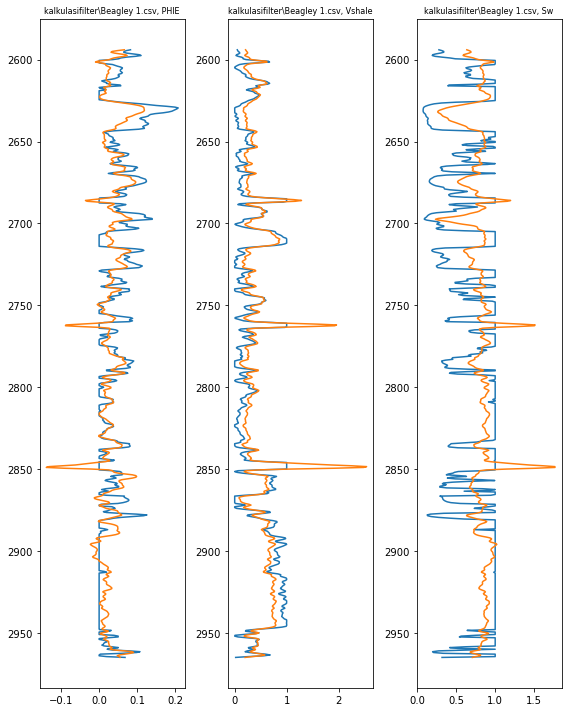

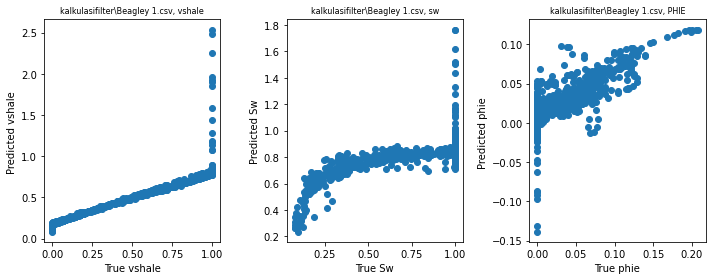

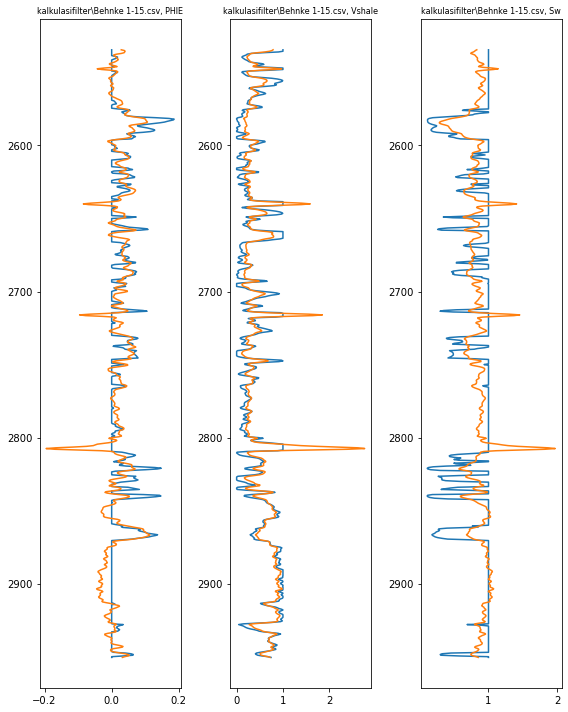

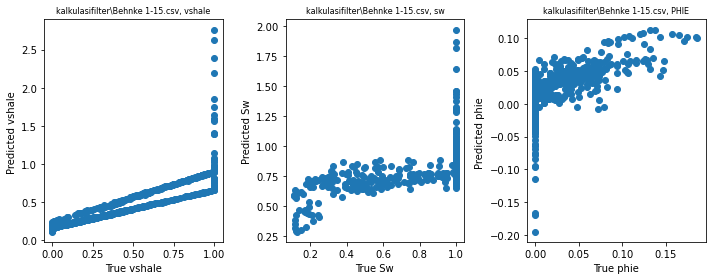

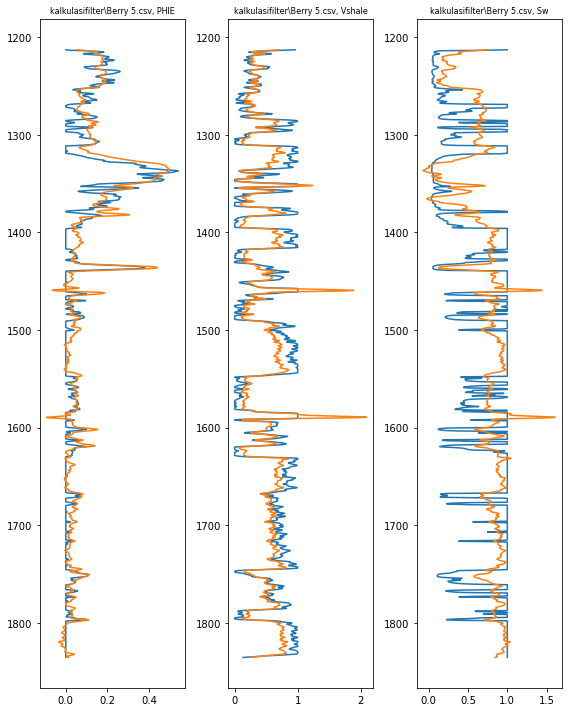

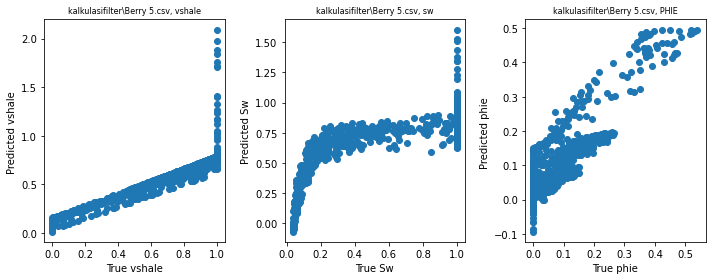

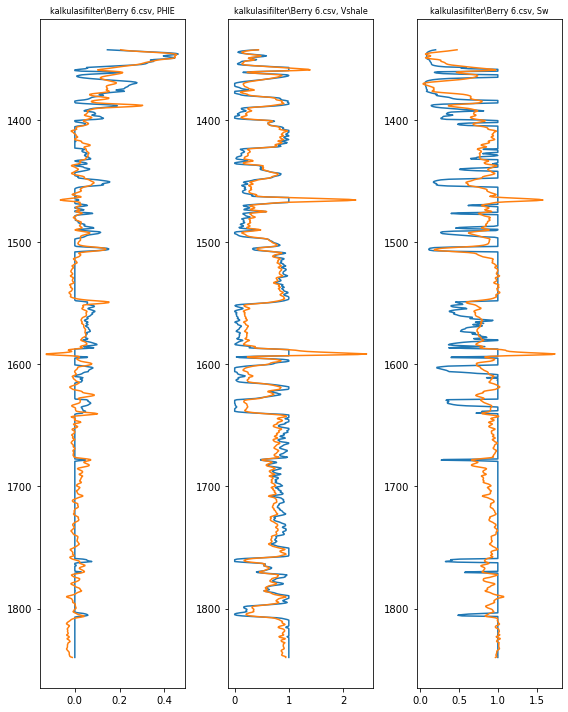

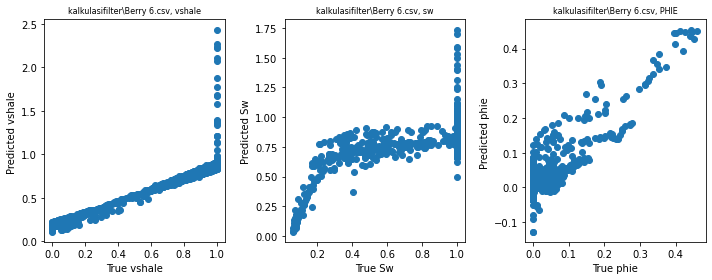

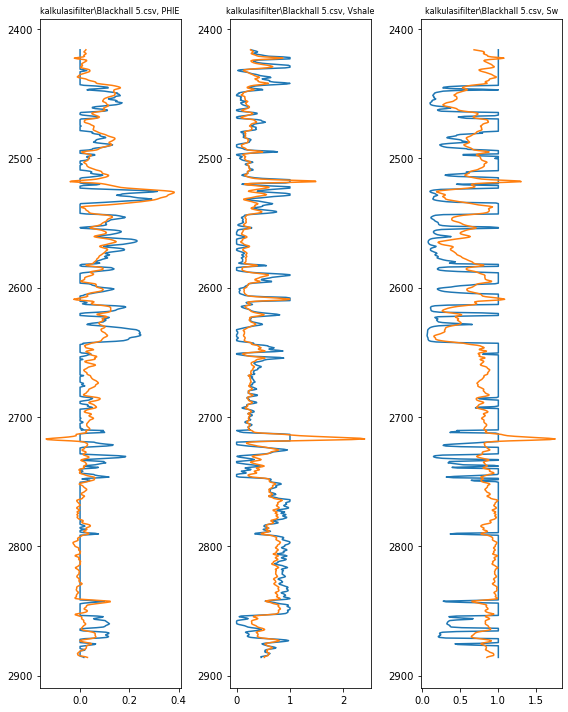

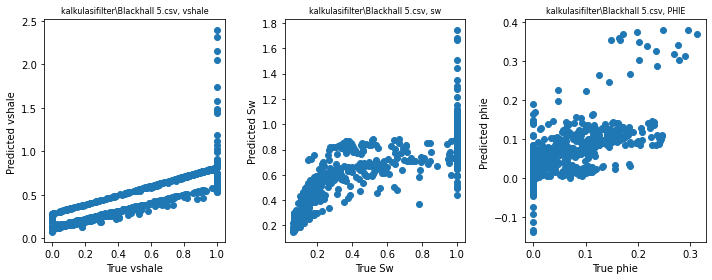

In [35]:
for well in blind:
    try:
        well1_ = pd.read_csv(well).dropna(subset=["GR", "NPHI", "RHOB", "RT","Vshale","PHID","PHIT","PHIE","Sw"])
        X_ = well1_[['GR', 'NPHI', 'RHOB', 'RT']]
    #     y_ = well1[["vshale","phid","phit","phie","sw"]]

        pred_ = LR.predict(X_)

        vshale = well1_['Vshale']
        phie = well1_['PHIE']
        sw = well1_['Sw']

        vshale_ = pred_[:,0]
        phie_ = pred_[:,3]
        sw_ = pred_[:,4]

        r2_vshale = np.round(r2_score(vshale, vshale_),3)
        r2_phie = np.round(r2_score(phie, phie_),3)
        r2_sw = np.round(r2_score(sw, sw_),3)

        print(well,'\t\t' "ini adalah: R2 Vshale" ,r2_vshale)
        print(well,'\t\t' "ini adalah: R2 PHIE" ,r2_phie)
        print(well,'\t\t' "ini adalah: R2 SW" ,r2_sw)
        print("=========================================")

        plt.figure(figsize=(8,10))
        plt.subplot(1,3,1)
        
        plt.title(f"{well}, PHIE",fontsize=8)
        plt.plot(phie,'DEPT',data=well1_)
        plt.plot(phie_,'DEPT',data=well1_)
        # plt.ylim(875,1000)
        plt.gca().invert_yaxis()

        plt.subplot(1,3,2)
        
        plt.title(f"{well}, Vshale",fontsize=8)
        plt.plot(vshale,'DEPT',data=well1_)
        plt.plot(vshale_,'DEPT',data=well1_)
        # plt.ylim(875,1000)
        plt.gca().invert_yaxis()


        plt.subplot(1,3,3)
        
        plt.title(f"{well}, Sw",fontsize=8)
        plt.plot(sw,'DEPT',data=well1_)
        plt.plot(sw_,'DEPT',data=well1_)
        # plt.ylim(875,1000)
        plt.gca().invert_yaxis()

        plt.tight_layout()

        
        plt.figure(figsize=(10,4))
      
        plt.subplot(1,3,1)
        plt.title(f"{well}, vshale", fontsize=8)
        plt.scatter(vshale, vshale_ )
        plt.xlabel("True vshale")
        plt.ylabel("Predicted vshale ")
    
        plt.subplot(1,3,2)
        plt.title(f"{well}, sw", fontsize=8)
        plt.scatter(sw, sw_ )
        plt.xlabel("True Sw")
        plt.ylabel("Predicted Sw")

        plt.subplot(1,3,3)
        plt.title(f"{well}, PHIE", fontsize=8)
        plt.scatter(phie, phie_ )
        plt.xlabel("True phie")
        plt.ylabel("Predicted phie ")

        plt.tight_layout()


    except:
        print('errror on ', well)
 




# <font color='green'>Testing Blind Accuracy,R2,Rmse  After Tuning 

## Random Forest Blind data testing After tuning

kalkulasifilter\A. Goering 1.csv 		ini adalah: R2 Vshale 0.942
kalkulasifilter\A. Goering 1.csv 		ini adalah: R2 PHIE 0.768
kalkulasifilter\A. Goering 1.csv 		ini adalah: R2 SW 0.65
kalkulasifilter\Alan C-1.csv 		ini adalah: R2 Vshale 0.89
kalkulasifilter\Alan C-1.csv 		ini adalah: R2 PHIE 0.761
kalkulasifilter\Alan C-1.csv 		ini adalah: R2 SW 0.708
kalkulasifilter\Amstutz 1-8.csv 		ini adalah: R2 Vshale 0.776
kalkulasifilter\Amstutz 1-8.csv 		ini adalah: R2 PHIE 0.265
kalkulasifilter\Amstutz 1-8.csv 		ini adalah: R2 SW 0.486
kalkulasifilter\Ankerholz 'A' 1.csv 		ini adalah: R2 Vshale 0.783
kalkulasifilter\Ankerholz 'A' 1.csv 		ini adalah: R2 PHIE 0.096
kalkulasifilter\Ankerholz 'A' 1.csv 		ini adalah: R2 SW 0.377
kalkulasifilter\B.B. Ainsworth 13.csv 		ini adalah: R2 Vshale 0.925
kalkulasifilter\B.B. Ainsworth 13.csv 		ini adalah: R2 PHIE 0.747
kalkulasifilter\B.B. Ainsworth 13.csv 		ini adalah: R2 SW 0.707
kalkulasifilter\Beagley 1.csv 		ini adalah: R2 Vshale 0.923
kalkulasifilter\Be

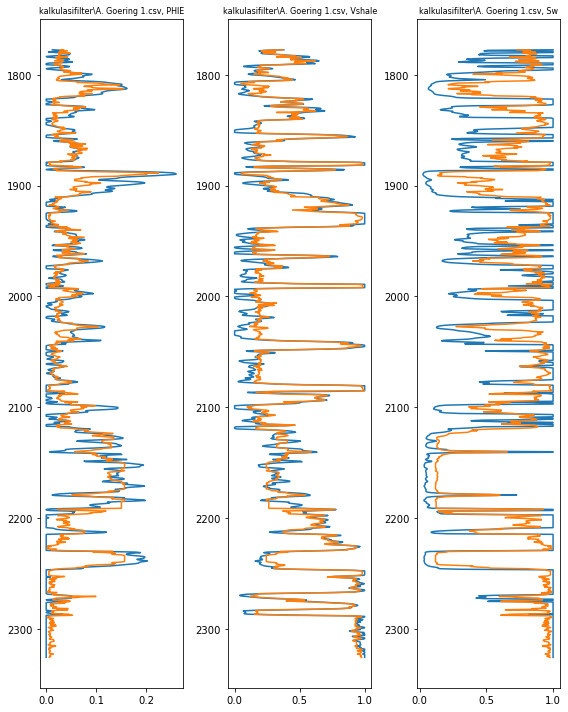

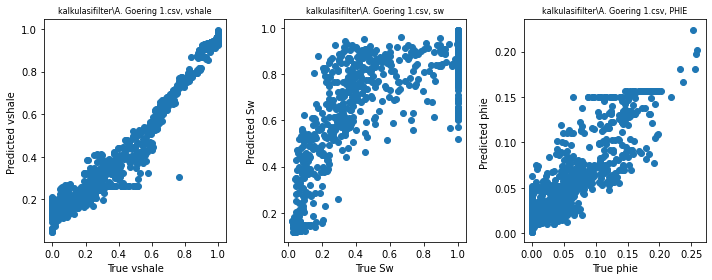

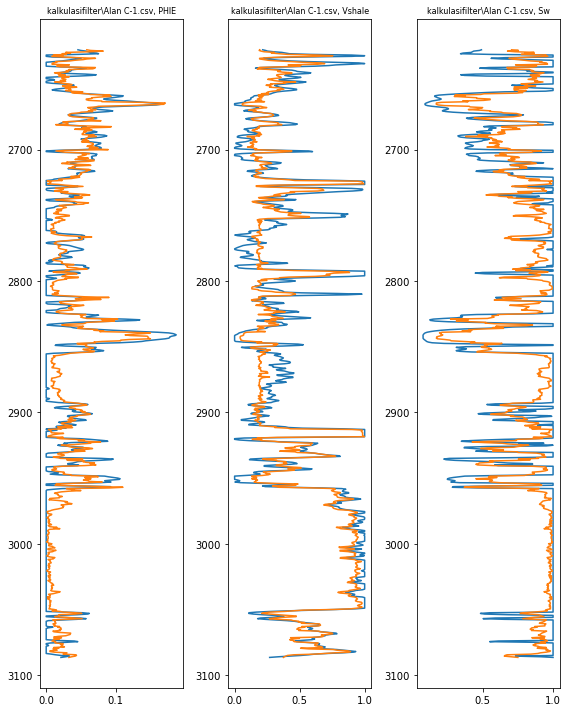

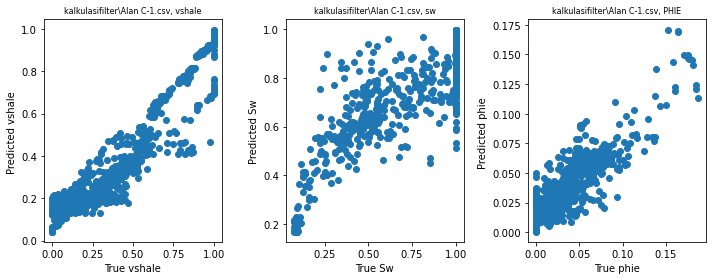

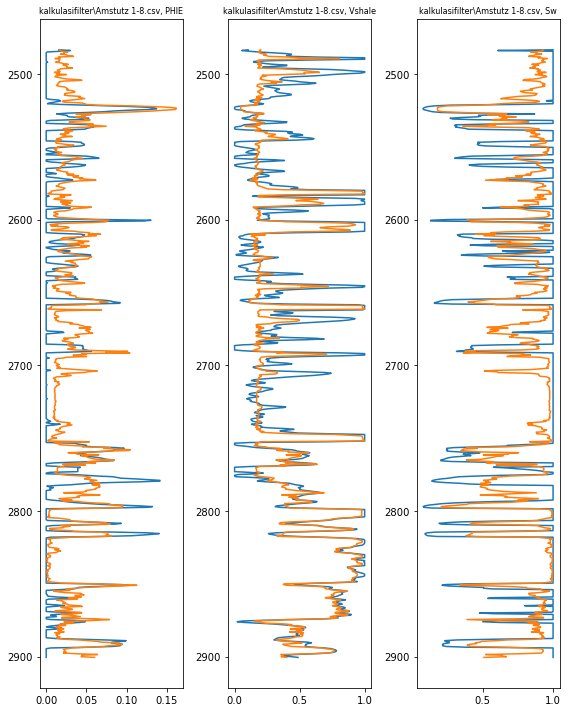

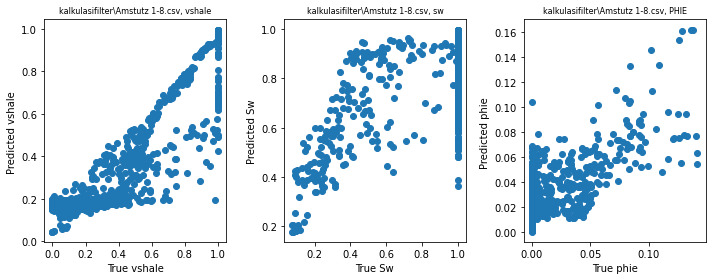

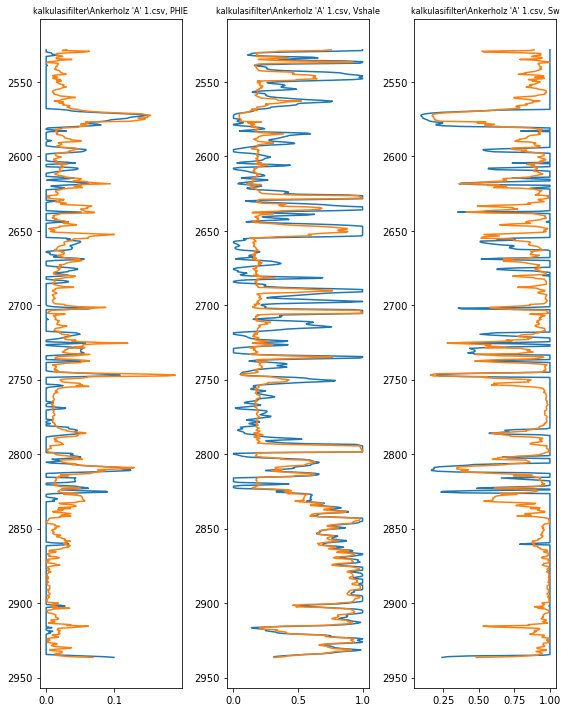

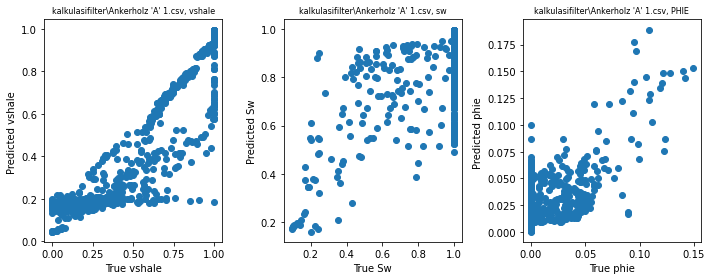

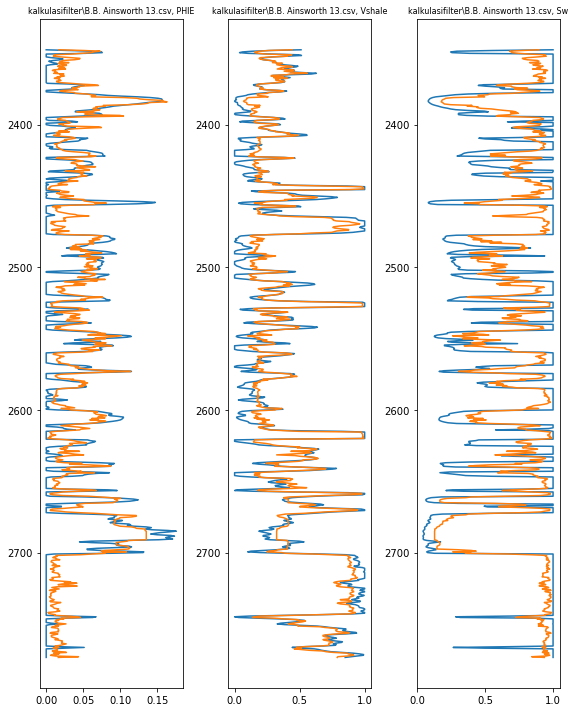

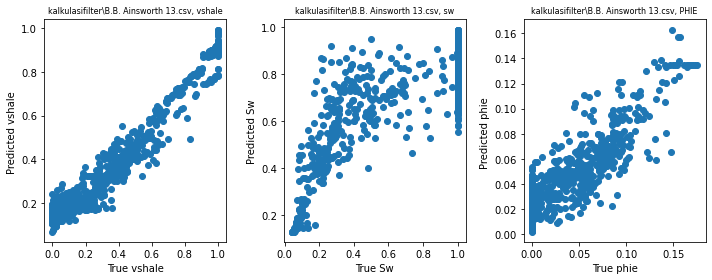

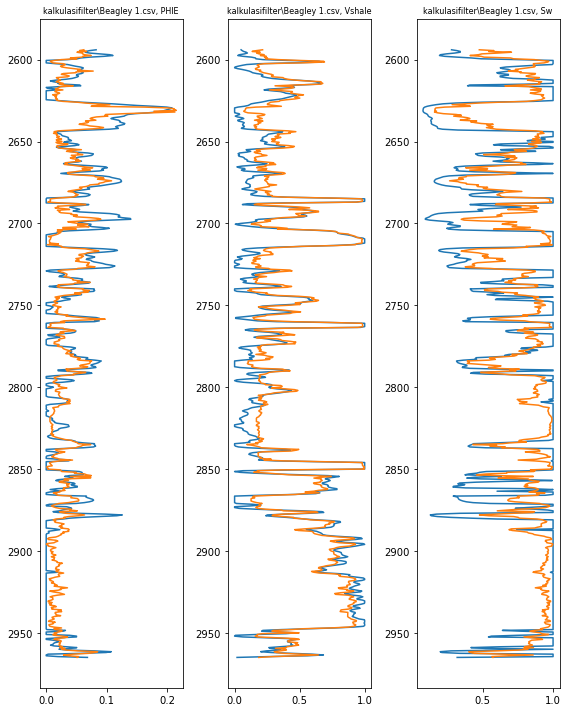

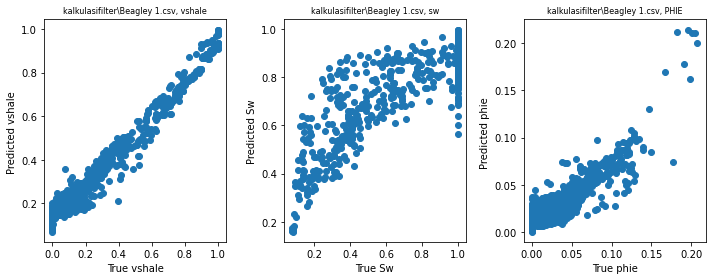

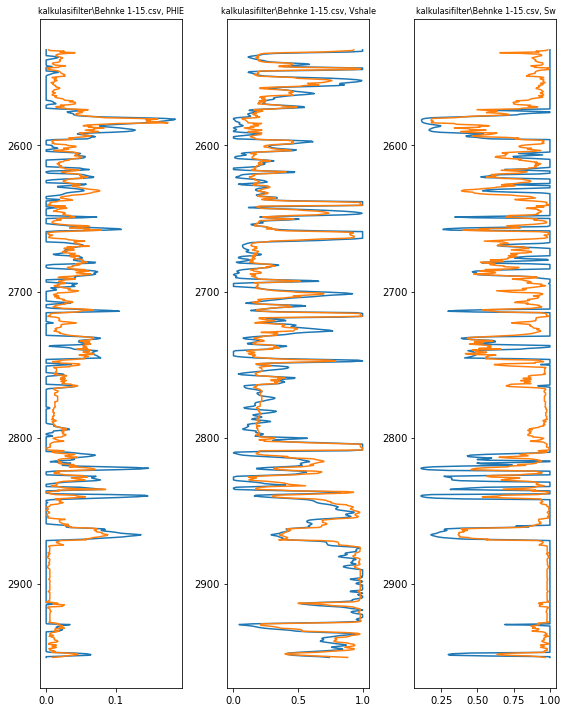

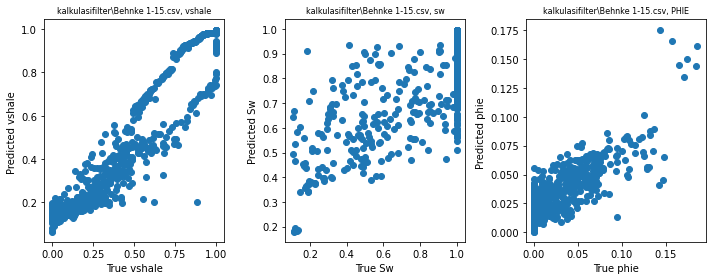

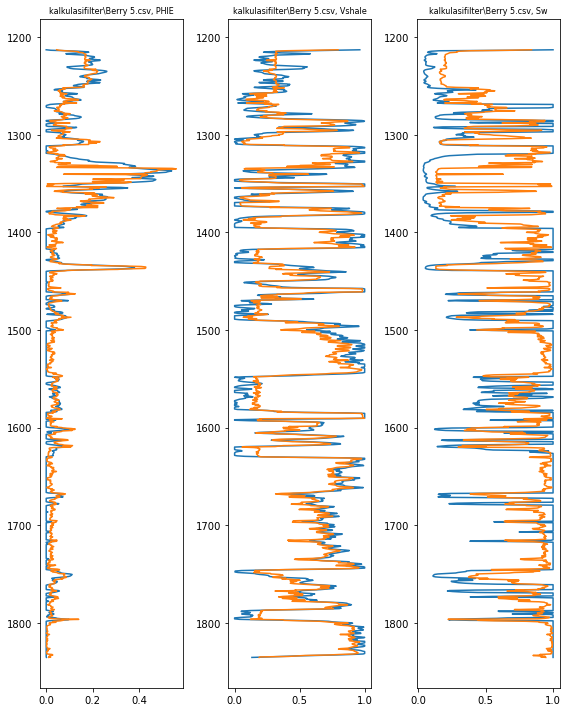

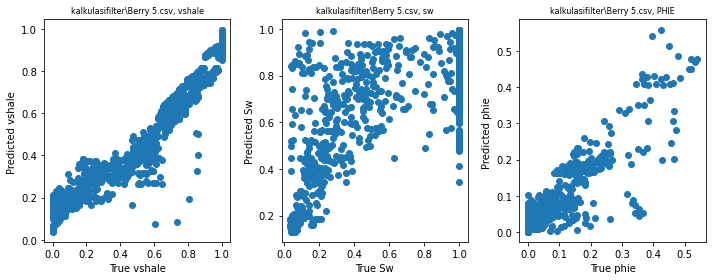

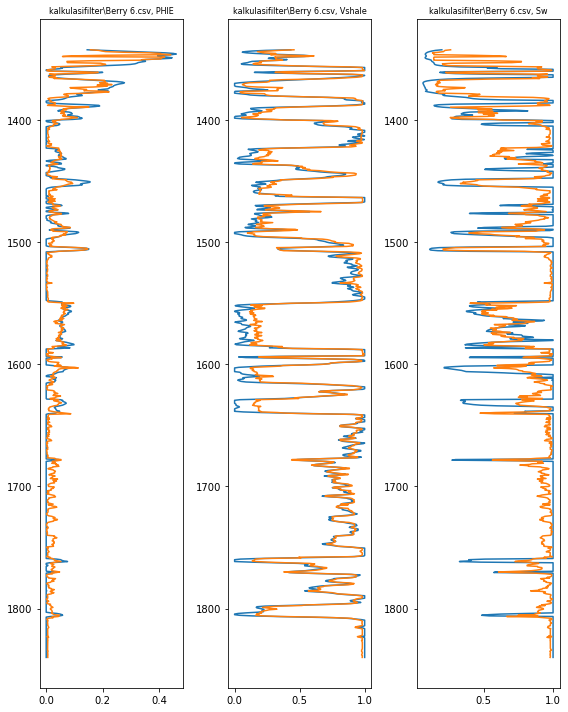

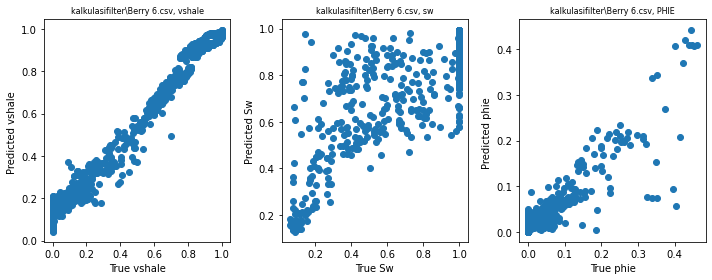

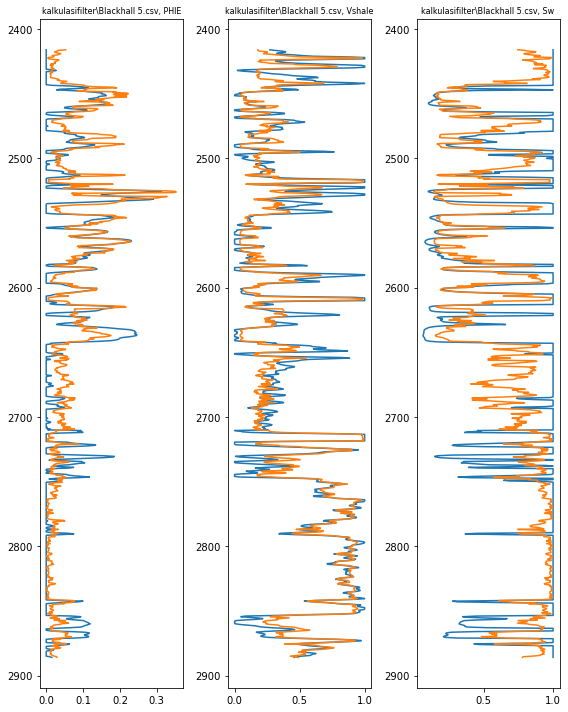

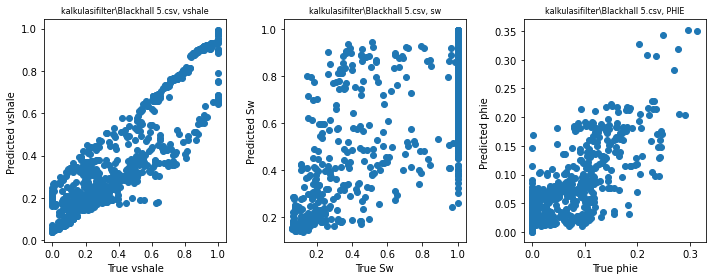

In [36]:
for well in blind:
    try:
        well1_ = pd.read_csv(well).dropna(subset=["GR", "NPHI", "RHOB", "RT","Vshale","PHID","PHIT","PHIE","Sw"])
        X_ = well1_[['GR', 'NPHI', 'RHOB', 'RT']]
    #     y_ = well1[["vshale","phid","phit","phie","sw"]]

        pred_ = bestmodel.predict(X_)

        vshale = well1_['Vshale']
        phie = well1_['PHIE']
        sw = well1_['Sw']

        vshale_ = pred_[:,0]
        phie_ = pred_[:,3]
        sw_ = pred_[:,4]

        r2_vshale = np.round(r2_score(vshale, vshale_),3)
        r2_phie = np.round(r2_score(phie, phie_),3)
        r2_sw = np.round(r2_score(sw, sw_),3)

        print(well,'\t\t' "ini adalah: R2 Vshale" ,r2_vshale)
        print(well,'\t\t' "ini adalah: R2 PHIE" ,r2_phie)
        print(well,'\t\t' "ini adalah: R2 SW" ,r2_sw)
        print("=========================================")

        plt.figure(figsize=(8,10))
        plt.subplot(1,3,1)
        
        plt.title(f"{well}, PHIE",fontsize=8)
        plt.plot(phie,'DEPT',data=well1_)
        plt.plot(phie_,'DEPT',data=well1_)
        # plt.ylim(875,1000)
        plt.gca().invert_yaxis()

        plt.subplot(1,3,2)
        
        plt.title(f"{well}, Vshale",fontsize=8)
        plt.plot(vshale,'DEPT',data=well1_)
        plt.plot(vshale_,'DEPT',data=well1_)
        # plt.ylim(875,1000)
        plt.gca().invert_yaxis()


        plt.subplot(1,3,3)
        
        plt.title(f"{well}, Sw",fontsize=8)
        plt.plot(sw,'DEPT',data=well1_)
        plt.plot(sw_,'DEPT',data=well1_)
        # plt.ylim(875,1000)
        plt.gca().invert_yaxis()

        plt.tight_layout()



        plt.figure(figsize=(10,4))
      
        plt.subplot(1,3,1)
        plt.title(f"{well}, vshale", fontsize=8)
        plt.scatter(vshale, vshale_ )
        plt.xlabel("True vshale")
        plt.ylabel("Predicted vshale ")
    
        plt.subplot(1,3,2)
        plt.title(f"{well}, sw", fontsize=8)
        plt.scatter(sw, sw_ )
        plt.xlabel("True Sw")
        plt.ylabel("Predicted Sw")

        plt.subplot(1,3,3)
        plt.title(f"{well}, PHIE", fontsize=8)
        plt.scatter(phie, phie_ )
        plt.xlabel("True phie")
        plt.ylabel("Predicted phie ")
        
        plt.tight_layout()
        


    except:
        print('errror on ', well)
 




## Decision Tree Blind Testing after tuning

kalkulasifilter\A. Goering 1.csv 		ini adalah: R2 Vshale 0.902
kalkulasifilter\A. Goering 1.csv 		ini adalah: R2 PHIE 0.677
kalkulasifilter\A. Goering 1.csv 		ini adalah: R2 SW 0.54
kalkulasifilter\Alan C-1.csv 		ini adalah: R2 Vshale 0.892
kalkulasifilter\Alan C-1.csv 		ini adalah: R2 PHIE 0.576
kalkulasifilter\Alan C-1.csv 		ini adalah: R2 SW 0.602
kalkulasifilter\Amstutz 1-8.csv 		ini adalah: R2 Vshale 0.793
kalkulasifilter\Amstutz 1-8.csv 		ini adalah: R2 PHIE -0.202
kalkulasifilter\Amstutz 1-8.csv 		ini adalah: R2 SW 0.378
kalkulasifilter\Ankerholz 'A' 1.csv 		ini adalah: R2 Vshale 0.82
kalkulasifilter\Ankerholz 'A' 1.csv 		ini adalah: R2 PHIE -0.31
kalkulasifilter\Ankerholz 'A' 1.csv 		ini adalah: R2 SW 0.284
kalkulasifilter\B.B. Ainsworth 13.csv 		ini adalah: R2 Vshale 0.894
kalkulasifilter\B.B. Ainsworth 13.csv 		ini adalah: R2 PHIE 0.677
kalkulasifilter\B.B. Ainsworth 13.csv 		ini adalah: R2 SW 0.754
kalkulasifilter\Beagley 1.csv 		ini adalah: R2 Vshale 0.885
kalkulasifilter\B

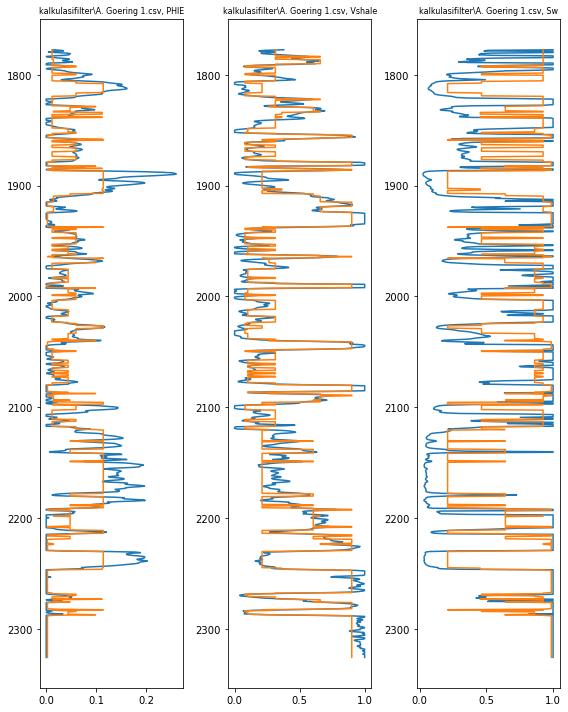

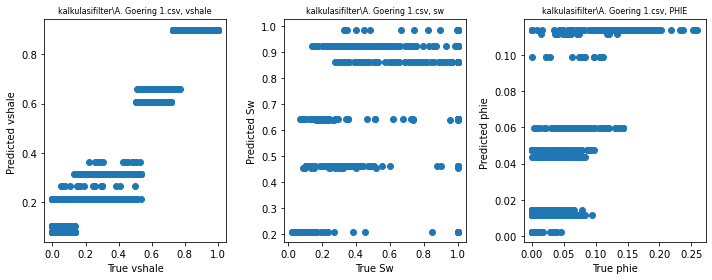

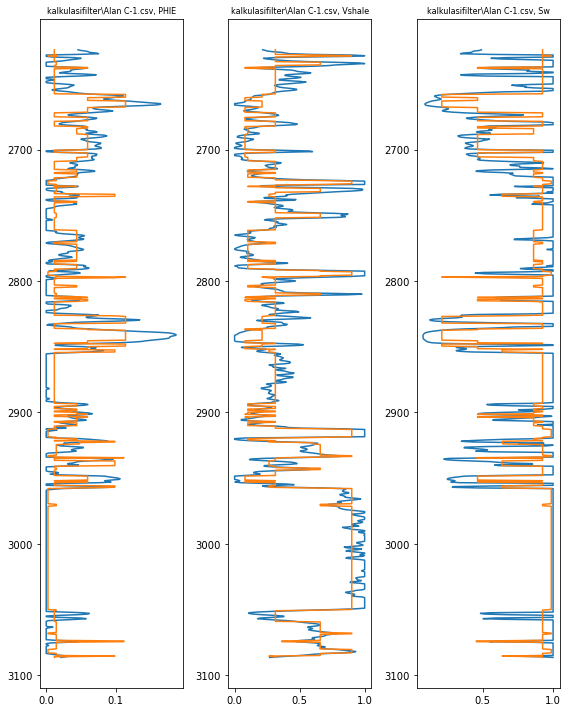

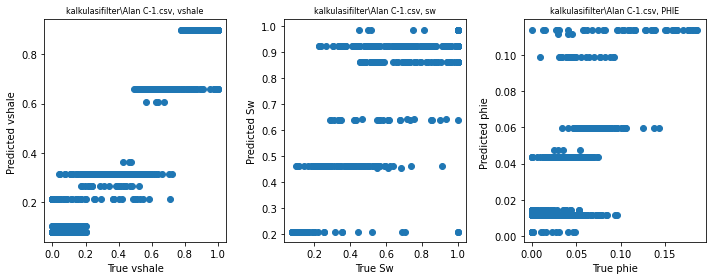

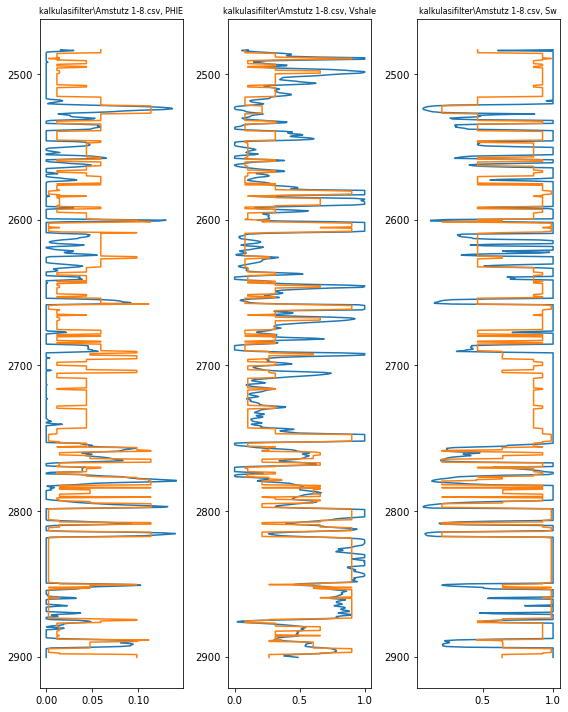

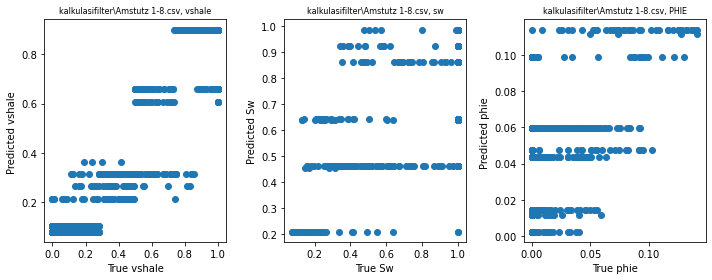

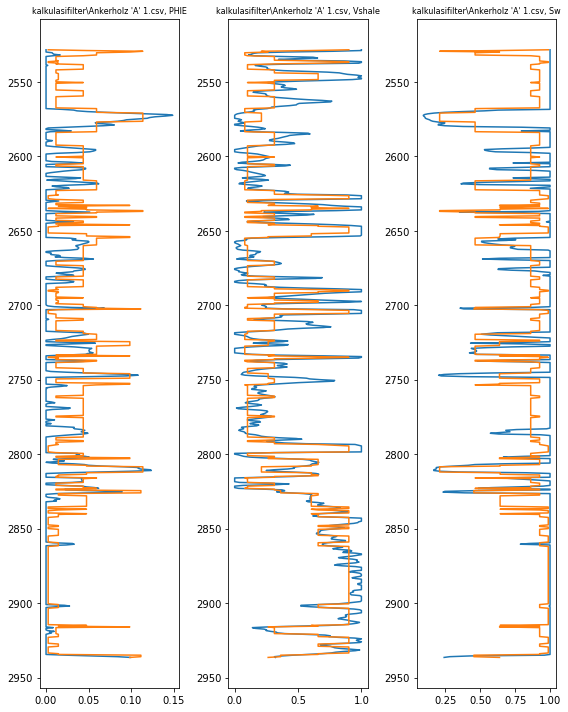

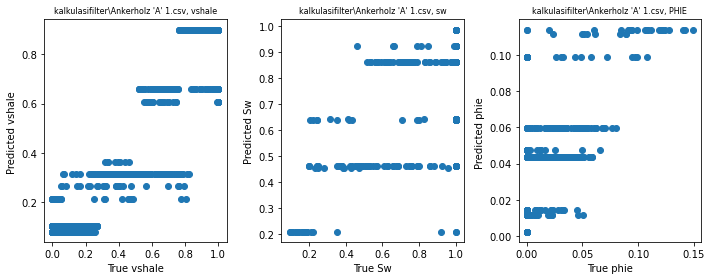

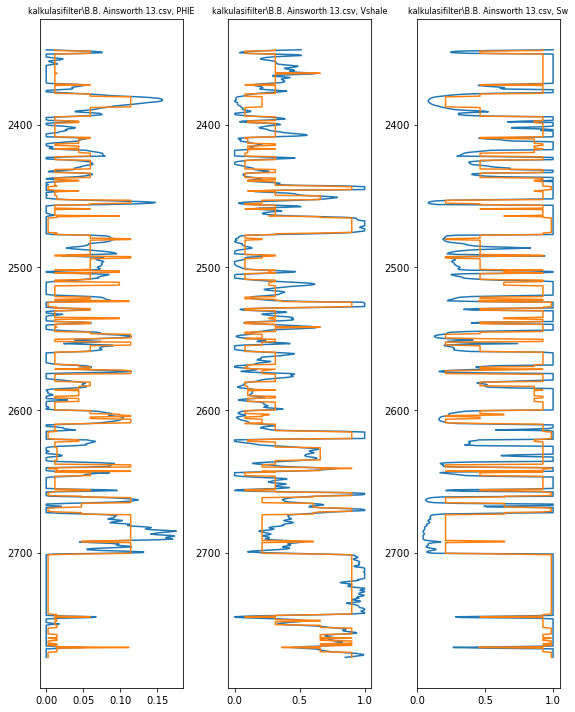

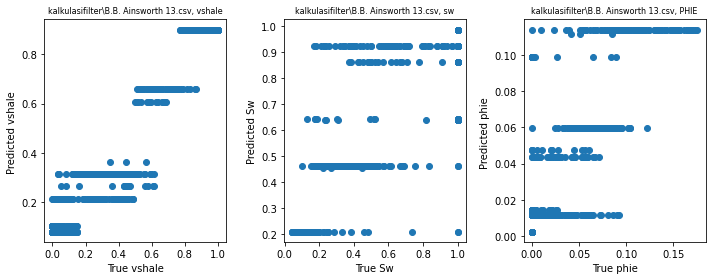

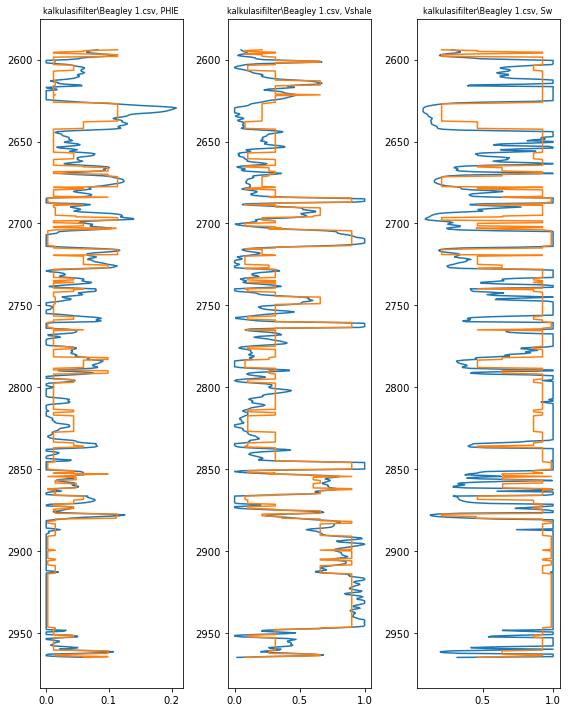

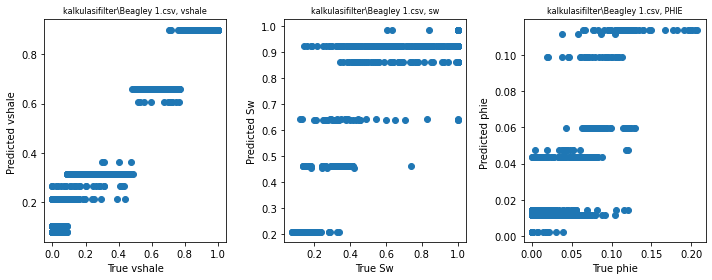

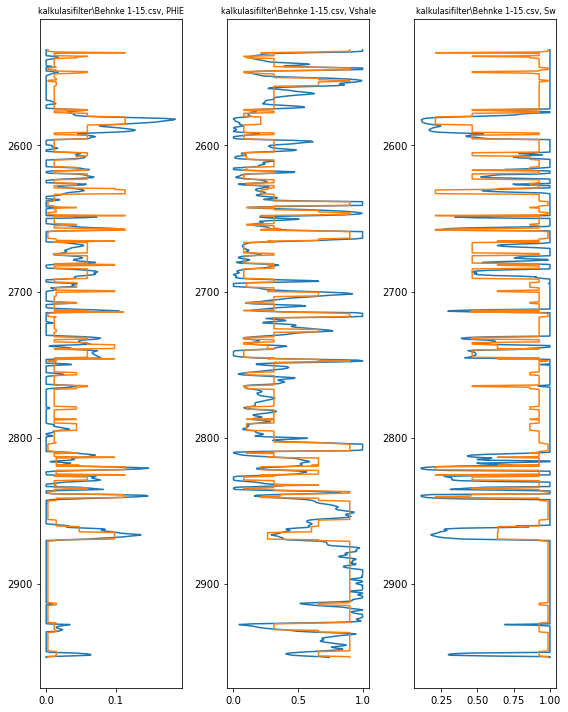

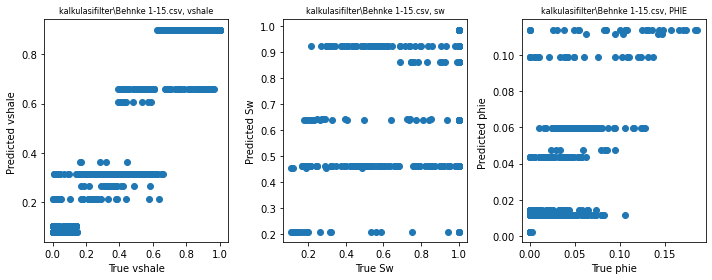

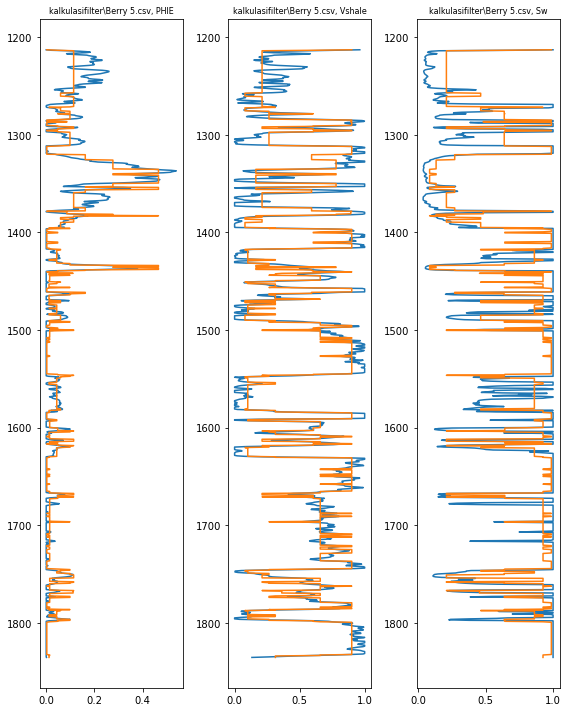

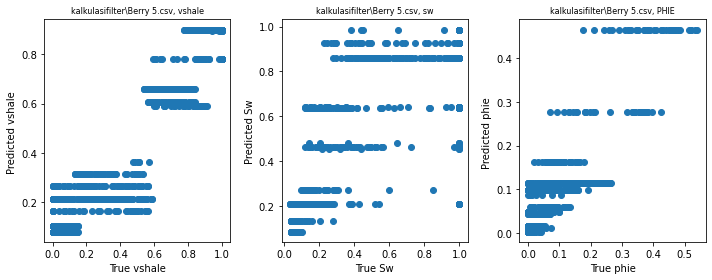

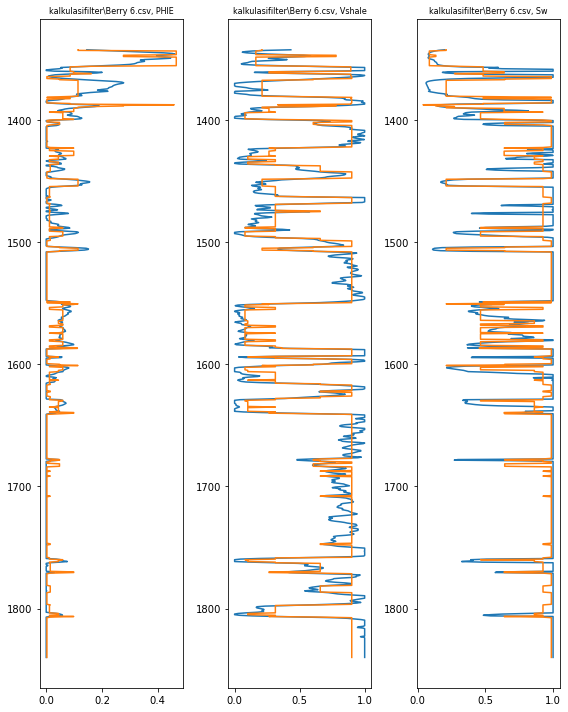

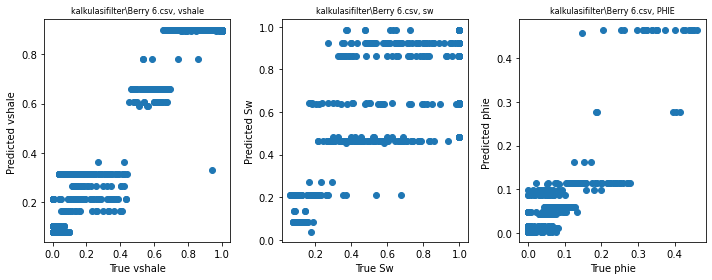

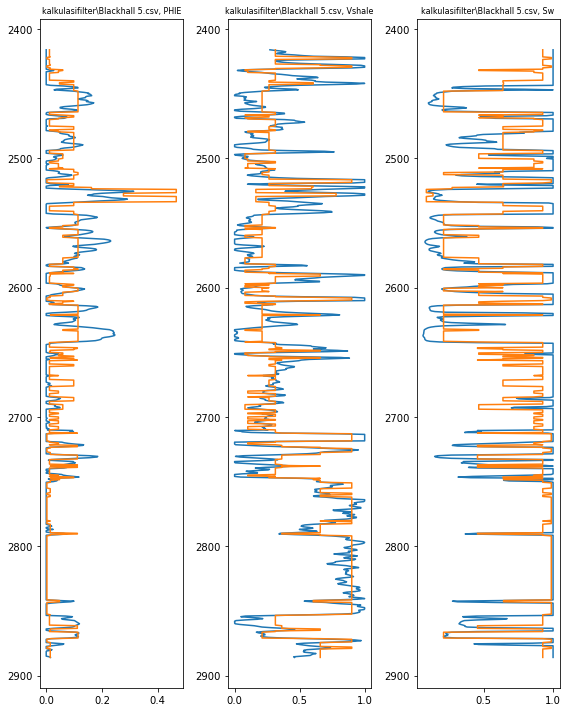

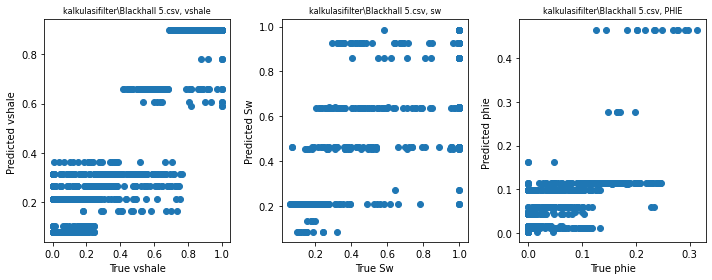

In [47]:
for well in blind:
    try:
        well1_ = pd.read_csv(well).dropna(subset=["GR", "NPHI", "RHOB", "RT","Vshale","PHID","PHIT","PHIE","Sw"])
        X_ = well1_[['GR', 'NPHI', 'RHOB', 'RT']]
    #     y_ = well1[["vshale","phid","phit","phie","sw"]]

        pred_ = best_model4.predict(X_)

        vshale = well1_['Vshale']
        phie = well1_['PHIE']
        sw = well1_['Sw']

        vshale_ = pred_[:,0]
        phie_ = pred_[:,3]
        sw_ = pred_[:,4]

        r2_vshale = np.round(r2_score(vshale, vshale_),3)
        r2_phie = np.round(r2_score(phie, phie_),3)
        r2_sw = np.round(r2_score(sw, sw_),3)

        print(well,'\t\t' "ini adalah: R2 Vshale" ,r2_vshale)
        print(well,'\t\t' "ini adalah: R2 PHIE" ,r2_phie)
        print(well,'\t\t' "ini adalah: R2 SW" ,r2_sw)
        print("=========================================")

        plt.figure(figsize=(8,10))
        plt.subplot(1,3,1)
        
        plt.title(f"{well}, PHIE",fontsize=8)
        plt.plot(phie,'DEPT',data=well1_)
        plt.plot(phie_,'DEPT',data=well1_)
        # plt.ylim(875,1000)
        plt.gca().invert_yaxis()

        plt.subplot(1,3,2)
        
        plt.title(f"{well}, Vshale",fontsize=8)
        plt.plot(vshale,'DEPT',data=well1_)
        plt.plot(vshale_,'DEPT',data=well1_)
        # plt.ylim(875,1000)
        plt.gca().invert_yaxis()


        plt.subplot(1,3,3)
        
        plt.title(f"{well}, Sw",fontsize=8)
        plt.plot(sw,'DEPT',data=well1_)
        plt.plot(sw_,'DEPT',data=well1_)
        # plt.ylim(875,1000)
        plt.gca().invert_yaxis()
        
       
        plt.tight_layout()


        
        plt.figure(figsize=(10,4))
      
        plt.subplot(1,3,1)
        plt.title(f"{well}, vshale", fontsize=8)
        plt.scatter(vshale, vshale_ )
        plt.xlabel("True vshale")
        plt.ylabel("Predicted vshale ")
    
        plt.subplot(1,3,2)
        plt.title(f"{well}, sw", fontsize=8)
        plt.scatter(sw, sw_ )
        plt.xlabel("True Sw")
        plt.ylabel("Predicted Sw")

        plt.subplot(1,3,3)
        plt.title(f"{well}, PHIE", fontsize=8)
        plt.scatter(phie, phie_ )
        plt.xlabel("True phie")
        plt.ylabel("Predicted phie ")

        
        
        plt.tight_layout()


        





    except:
        print('errror on ', well)
 




### 

In [38]:
import pandas as pd
data={"Algoritma":["Linear Regression", "Random Forest", "Decision Tree"],"MAE":[0.10,0.08,0.09],"RMSE":[0.14,0.11,0.13],"R2":[0.74,0.83,0.78]}
kotak=pd.DataFrame(data)
kotak

Algoritma   MAE  RMSE    R2
0  Linear Regression  0.10  0.14  0.74
1      Random Forest  0.08  0.11  0.83
2      Decision Tree  0.09  0.13  0.78

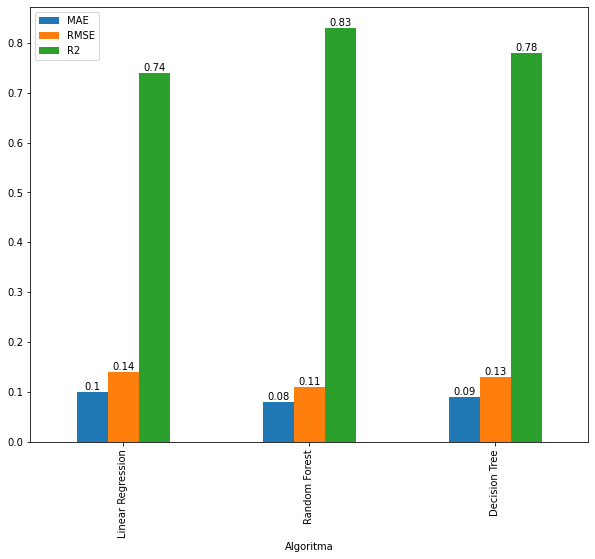

In [39]:
lore=kotak.plot(kind="bar",x="Algoritma",y=["MAE","RMSE","R2"],figsize=(10,8))
x_label=("Algoritma")
for i in lore.containers:
    lore.bar_label(i,)



